<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_100-150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


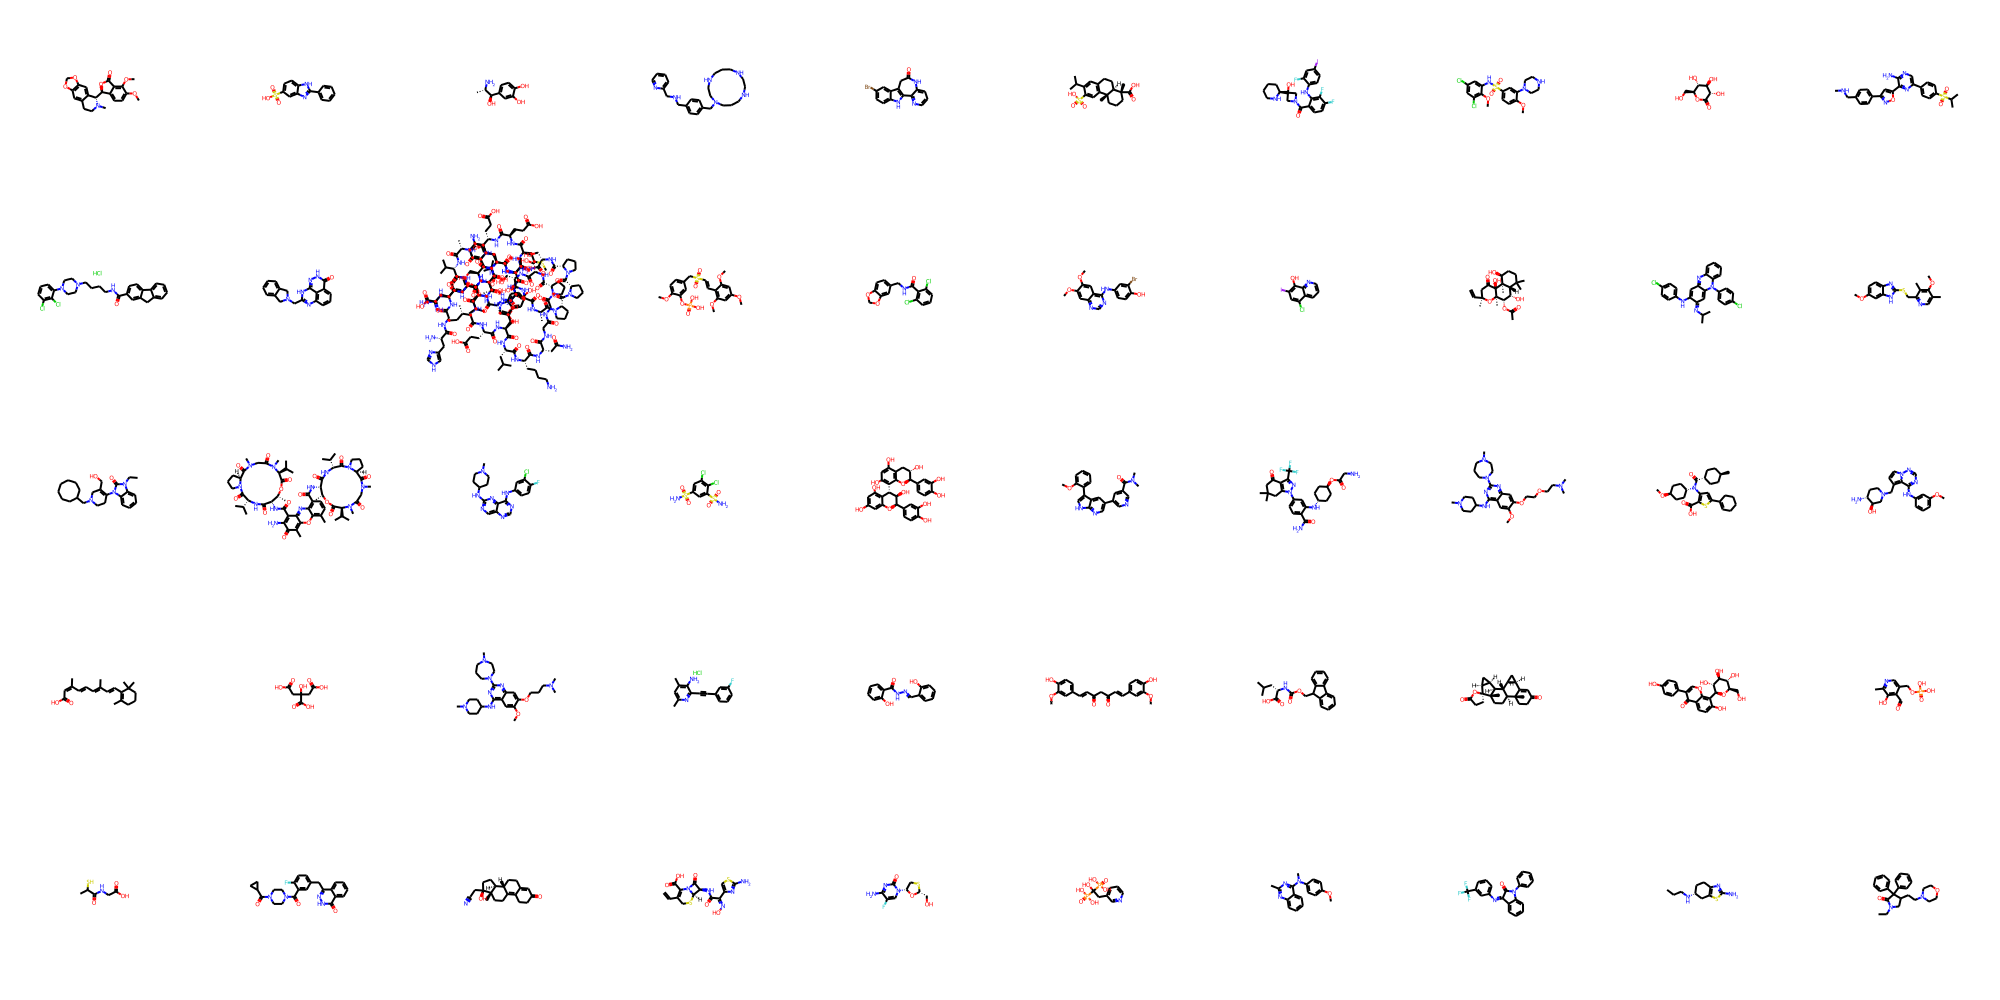

In [165]:
smiles_list = ['COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2cc3c(cc2CCN1C)OCO3',
'O=S(=O)(O)c1ccc2[nH]c(-c3ccccc3)nc2c1',
'C[C@H](N)[C@H](O)c1ccc(O)c(O)c1',
'c1ccc(CNCc2ccc(CN3CCCNCCNCCCNCC3)cc2)nc1',
'O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ncccc2N1',
'CC(C)c1cc2c(cc1S(=O)(=O)O)[C@@]1(C)CCC[C@@](C)(C(=O)O)[C@@H]1CC2',
'O=C(c1ccc(F)c(F)c1Nc1ccc(I)cc1F)N1CC(O)([C@@H]2CCCCN2)C1',
'COc1ccc(S(=O)(=O)Nc2cc(Cl)cc(Cl)c2OC)cc1N1CCNCC1',
'O=C1O[C@@H](CO)[C@H](O)[C@@H](O)[C@@H]1O',
'CNCc1ccc(-c2cc(-c3nc(-c4ccc(S(=O)(=O)C(C)C)cc4)cnc3N)on2)cc1',
'Cl.O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc2c(c1)Cc1ccccc1-2',
'O=c1[nH]nc2c3c(cccc13)N=C(CN1Cc3ccccc3C1)N2',
'CC[C@H](C)[C@H](NC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@@H](CC(C)C)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@@H](CCC(=O)O)NC(=O)[C@@H](CCSC)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CO)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(=O)O)NC(=O)[C@@H](CO)NC(=O)[C@@H](NC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)CNC(=O)[C@H](CCC(=O)O)NC(=O)CNC(=O)[C@@H](N)Cc1c[nH]cn1)[C@@H](C)O)[C@@H](C)O)C(C)C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(N)=O)C(=O)NCC(=O)NCC(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](C)C(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)N[C@@H](CO)C(N)=O',
'COc1cc(OC)c(/C=C/S(=O)(=O)Cc2ccc(OC)c(OP(=O)(O)O)c2)c(OC)c1',
'O=C(NCc1ccc2c(c1)OCO2)c1c(Cl)cccc1Cl',
'COc1cc2ncnc(Nc3ccc(O)c(Br)c3)c2cc1OC',
'Oc1c(I)cc(Cl)c2cccnc12',
'C=C[C@@]1(C)CC(=O)[C@@]2(O)[C@](C)(O1)[C@@H](OC(C)=O)[C@@H](O)[C@H]1C(C)(C)CC[C@H](O)[C@@]12C',
'CC(C)/N=c1\cc2n(-c3ccc(Cl)cc3)c3ccccc3nc-2cc1Nc1ccc(Cl)cc1',
'COc1ccc2nc(SCc3ncc(C)c(OC)c3C)[nH]c2c1',
'CCn1c(=O)n(C2=C(CO)CN(CC3CCCCCCC3)CC2)c2ccccc21',
'Cc1c2oc3c(C)ccc(C(=O)N[C@@H]4C(=O)N[C@H](C(C)C)C(=O)N5CCC[C@H]5C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]4C)c3nc-2c(C(=O)N[C@@H]2C(=O)N[C@H](C(C)C)C(=O)N3CCC[C@H]3C(=O)N(C)CC(=O)N(C)[C@@H](C(C)C)C(=O)O[C@@H]2C)c(N)c1=O',
'CN1CCC(Nc2ncc3ncnc(Nc4ccc(F)c(Cl)c4)c3n2)CC1',
'NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1',
'Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)[C@H]2c1c(O)cc(O)c2c1O[C@H](c1ccc(O)c(O)c1)[C@@H](O)C2',
'COc1ccccc1-c1c[nH]c2ncc(-c3cncc(C(=O)N(C)C)c3)cc12',
'CC1(C)CC(=O)c2c(C(F)(F)F)nn(-c3ccc(C(N)=O)c(N[C@H]4CC[C@H](OC(=O)CN)CC4)c3)c2C1',
'COc1cc2c(NC3CCN(C)CC3)nc(N3CCCN(C)CC3)nc2cc1OCCOCCN(C)C',
'CO[C@H]1CC[C@H](N(c2cc(C3=CCCCC3)sc2C(=O)O)C(=O)[C@H]2CC[C@H](C)CC2)CC1',
'COc1cccc(Nc2ncnn3ccc(CN4CC[C@@H](N)[C@H](O)C4)c23)c1',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C\C(=O)O)C(C)(C)CCC1',
'O=C(O)CC(O)(CC(=O)O)C(=O)O',
'COc1cc2c(NC3CCN(C)CC3)nc(N3CCCN(C)CC3)nc2cc1OCCCN(C)C',
'Cc1cc(C)c(N)c(C#Cc2cccc(F)c2)n1.Cl',
'O=C(N/N=C/c1ccccc1O)c1ccccc1O',
'COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O',
'CC(C)C[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O',
'C[C@]12CC[C@H]3[C@H]([C@@H]1[C@@H]1C[C@@H]1[C@@]21CCC(=O)O1)[C@H]1C[C@H]1C1=CC(=O)CC[C@@]13C',
'O=c1c(-c2ccc(O)cc2)coc2c([C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)c(O)ccc12',
'Cc1ncc(COP(=O)(O)O)c(C=O)c1O',
'CC(S)C(=O)NCC(=O)O',
'O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(=O)C2CC2)CC1',
'C[C@]12CCC3=C4CCC(=O)C=C4CC[C@H]3[C@@H]1CC[C@@]2(O)CC#N',
'C=CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)/C(=N\O)c3csc(N)n3)[C@H]2SC1',
'Nc1nc(=O)n([C@@H]2CS[C@H](CO)O2)cc1F',
'O=P(O)(O)C(O)(Cc1cccnc1)P(=O)(O)O',
'COc1ccc(N(C)c2nc(C)nc3ccccc23)cc1',
'O=C1/C(=N\c2cccc(C(F)(F)F)c2)c2ccccc2N1c1ccccc1',
'CCCN[C@@H]1CCc2nc(N)sc2C1',
'CCN1CC(CCN2CCOCC2)C(c2ccccc2)(c2ccccc2)C1=O',
'O=C(O)c1ccccc1NCCc1ccccc1',

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



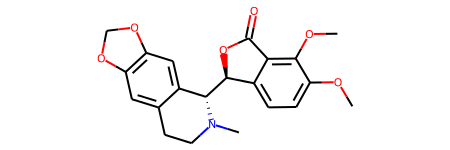

In [166]:
M1 = mol_list [0]
M1

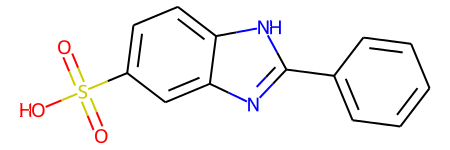

In [167]:
M2 = mol_list [1]
M2

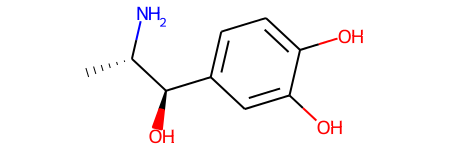

In [168]:
M3 = mol_list [2]
M3

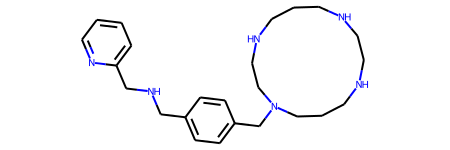

In [169]:
M4 = mol_list [3]
M4

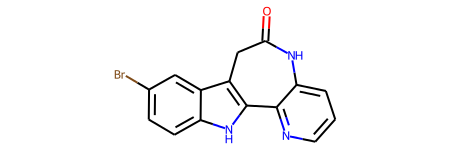

In [170]:
M5 = mol_list [4]
M5

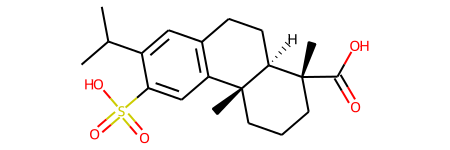

In [171]:
M6 = mol_list [5]
M6

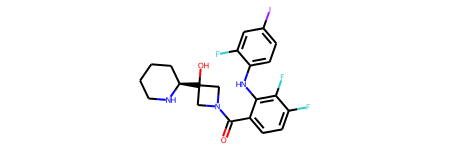

In [172]:
M7 = mol_list [6]
M7

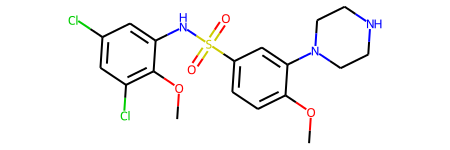

In [173]:
M8 = mol_list [7]
M8

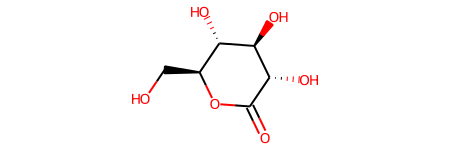

In [174]:
M9 = mol_list [8]
M9

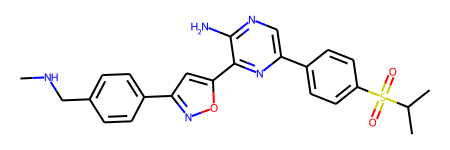

In [175]:
M10= mol_list [9]
M10

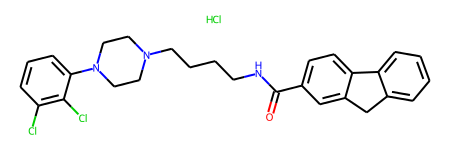

In [176]:
M11= mol_list [10]
M11

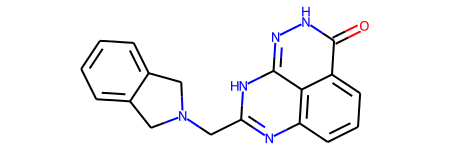

In [177]:
M12= mol_list [11]
M12

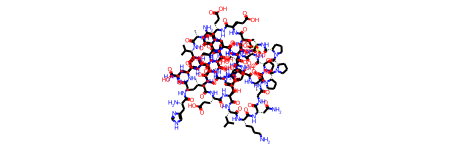

In [178]:
M13= mol_list [12]
M13

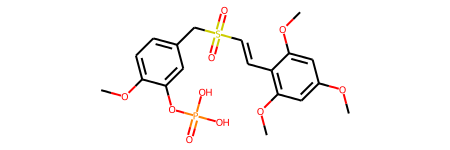

In [179]:
M14= mol_list [13]
M14

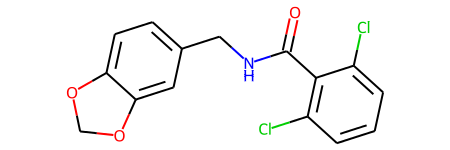

In [180]:
M15= mol_list [14]
M15

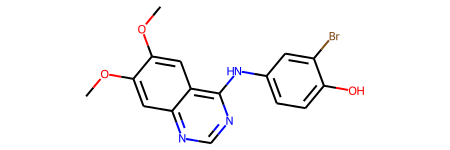

In [184]:
M16= mol_list [15]
M16

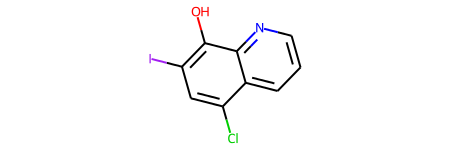

In [185]:
M17= mol_list [16]
M17

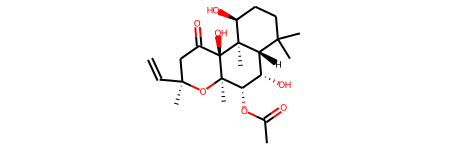

In [186]:
M18= mol_list [17]
M18

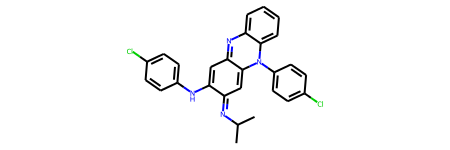

In [187]:
M19= mol_list [18]
M19

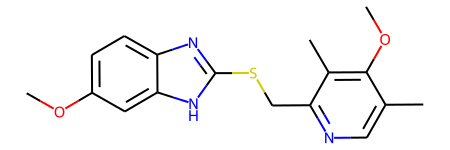

In [188]:
M20= mol_list [19]
M20

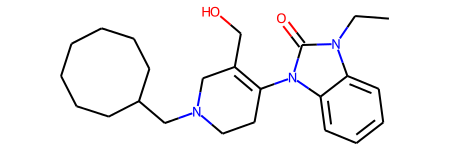

In [189]:
M21= mol_list [20]
M21

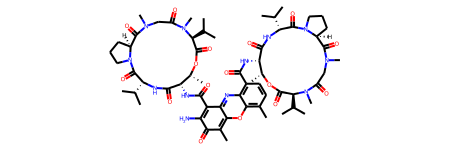

In [190]:
M22= mol_list [21]
M22

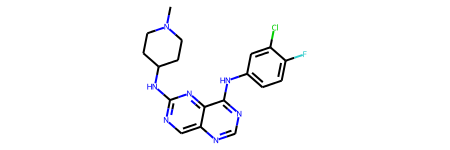

In [191]:
M23= mol_list [22]
M23

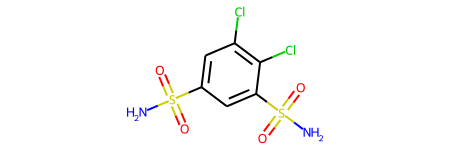

In [192]:
M24= mol_list [23]
M24

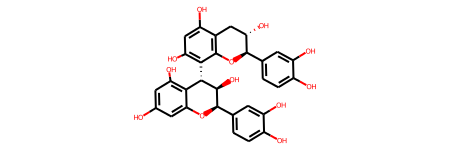

In [193]:
M25= mol_list [24]
M25

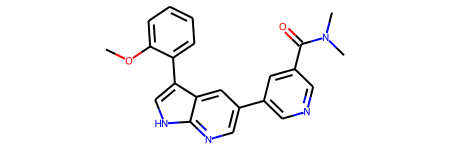

In [194]:
M26= mol_list [25]
M26

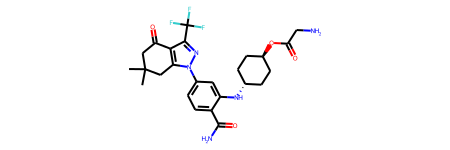

In [195]:
M27= mol_list [26]
M27

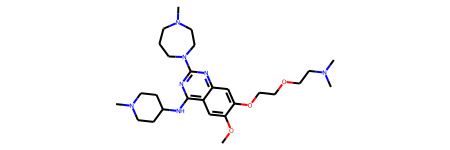

In [196]:
M28= mol_list [27]
M28

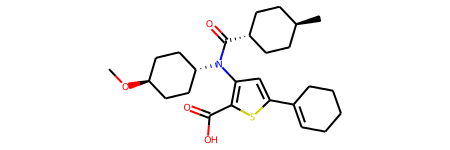

In [197]:
M29= mol_list [28]
M29

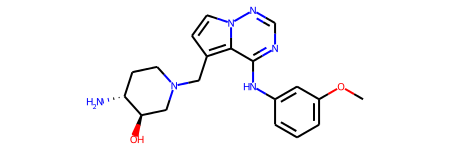

In [198]:
M30= mol_list [29]
M30

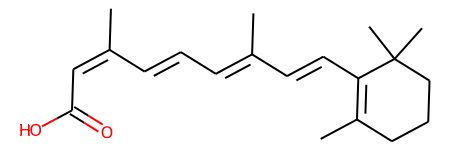

In [199]:
M31= mol_list [30]
M31

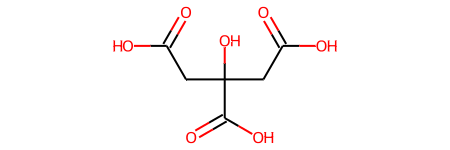

In [200]:
M32= mol_list [31]
M32

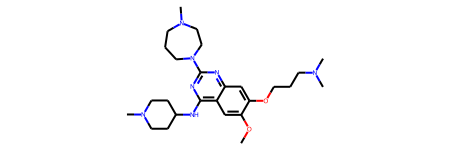

In [201]:
M33= mol_list [32]
M33

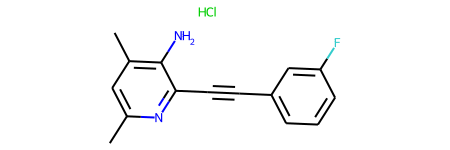

In [202]:
M34= mol_list [33]
M34

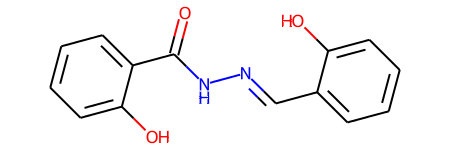

In [203]:
M35= mol_list [34]
M35

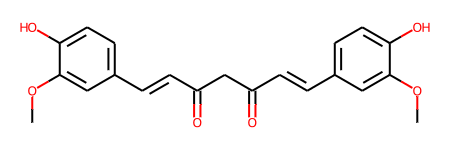

In [204]:
M36= mol_list [35]
M36

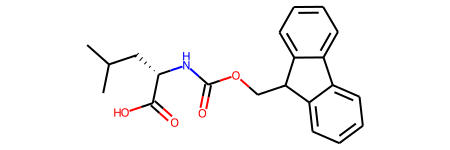

In [205]:
M37= mol_list [36]
M37

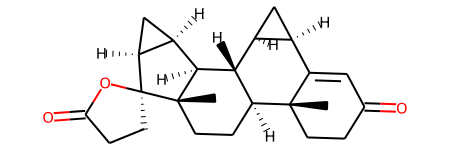

In [206]:
M38= mol_list [37]
M38


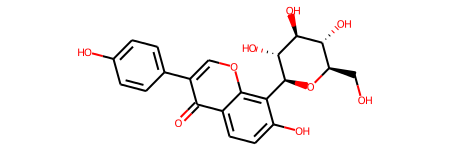

In [207]:
M39= mol_list [38]
M39

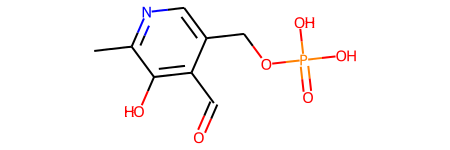

In [208]:
M40= mol_list [39]
M40

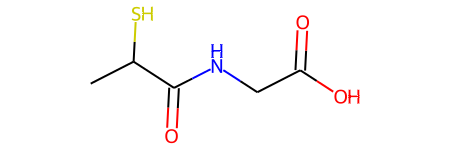

In [209]:
M41= mol_list [40]
M41

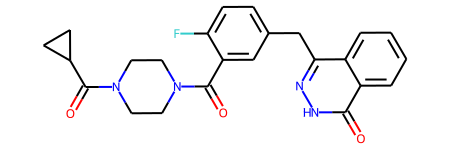

In [210]:
M42= mol_list [41]
M42

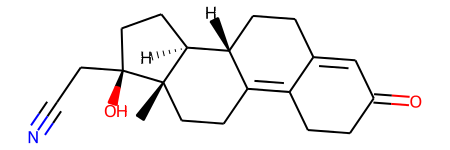

In [211]:
M43= mol_list [42]
M43

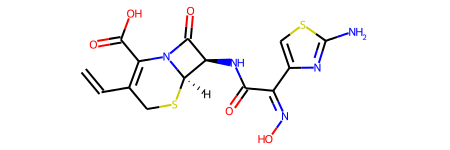

In [212]:
M44= mol_list [43]
M44

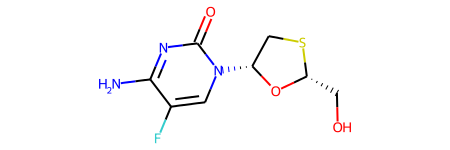

In [213]:
M45= mol_list [44]
M45

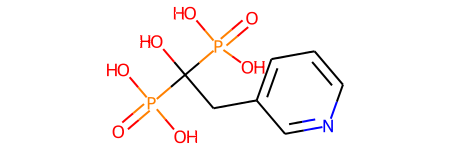

In [214]:
M46= mol_list [45]
M46

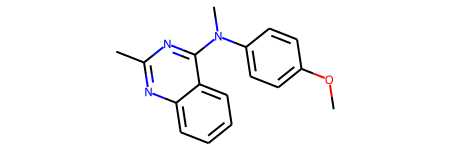

In [215]:
M47= mol_list [46]
M47

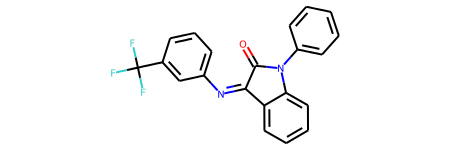

In [216]:
M48= mol_list [47]
M48

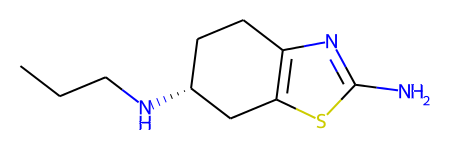

In [217]:
M49= mol_list [48]
M49

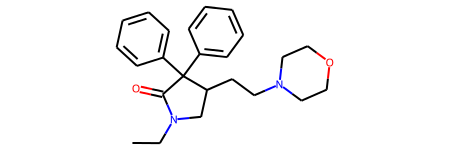

In [218]:
M50= mol_list [49]
M50

In [219]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[3,
 15,
 33,
 64,
 94,
 108,
 121,
 135,
 212,
 233,
 249,
 273,
 307,
 314,
 325,
 333,
 356,
 441,
 456,
 486,
 512,
 514,
 517,
 575,
 612,
 613,
 636,
 649,
 650,
 656,
 695,
 714,
 723,
 726,
 728,
 738,
 750,
 776,
 817,
 839,
 841,
 849,
 864,
 875,
 881,
 926,
 935,
 946,
 956,
 969,
 1019]

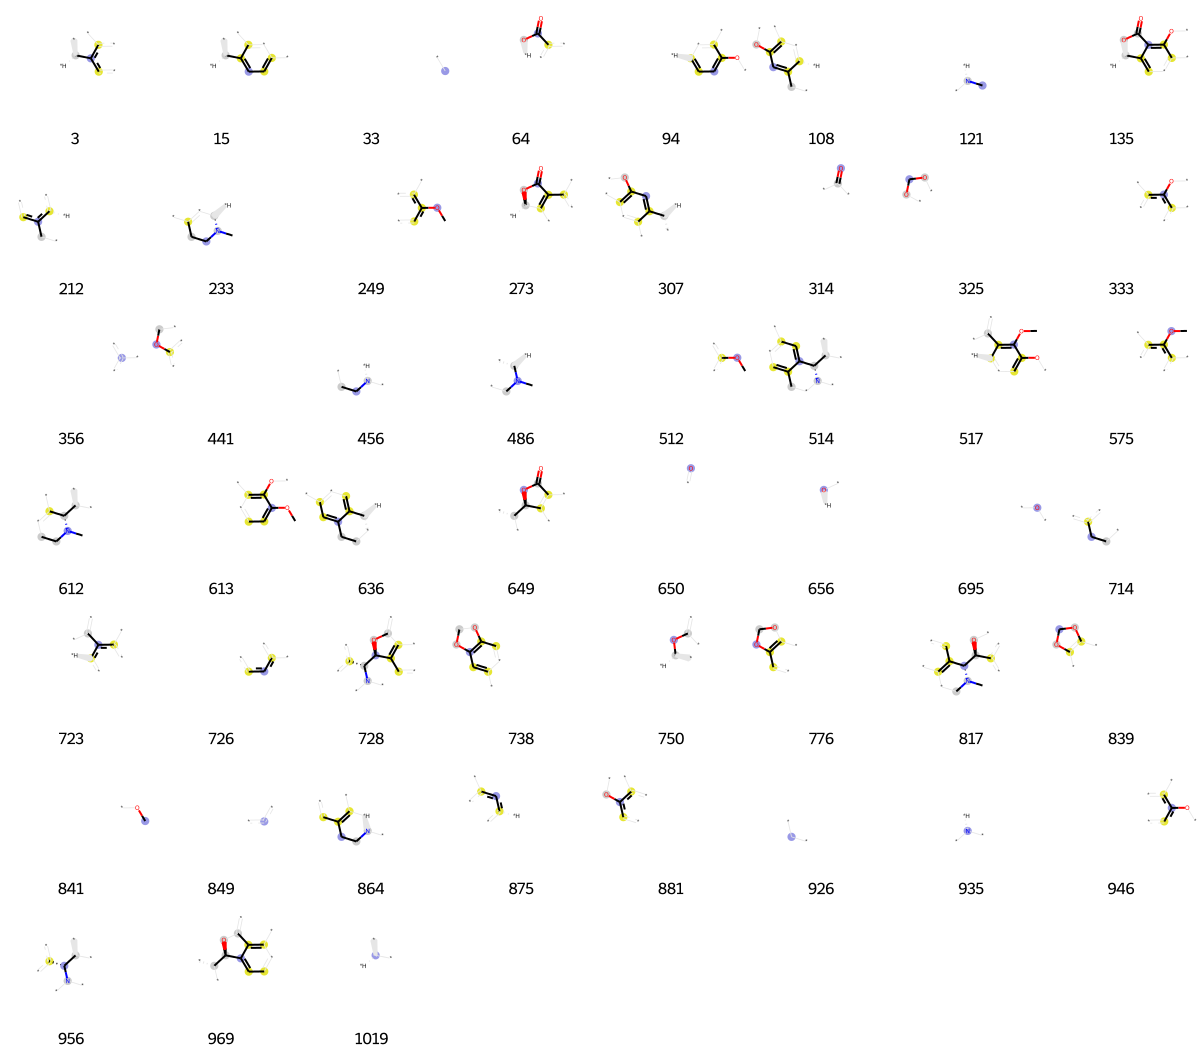

In [220]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [221]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[3,
 15,
 33,
 64,
 94,
 108,
 121,
 135,
 212,
 233,
 249,
 273,
 307,
 314,
 325,
 333,
 356,
 441,
 456,
 486,
 512,
 514,
 517,
 575,
 612,
 613,
 636,
 649,
 650,
 656,
 695,
 714,
 723,
 726,
 728,
 738,
 750,
 776,
 817,
 839,
 841,
 849,
 864,
 875,
 881,
 926,
 935,
 946,
 956,
 969,
 1019]

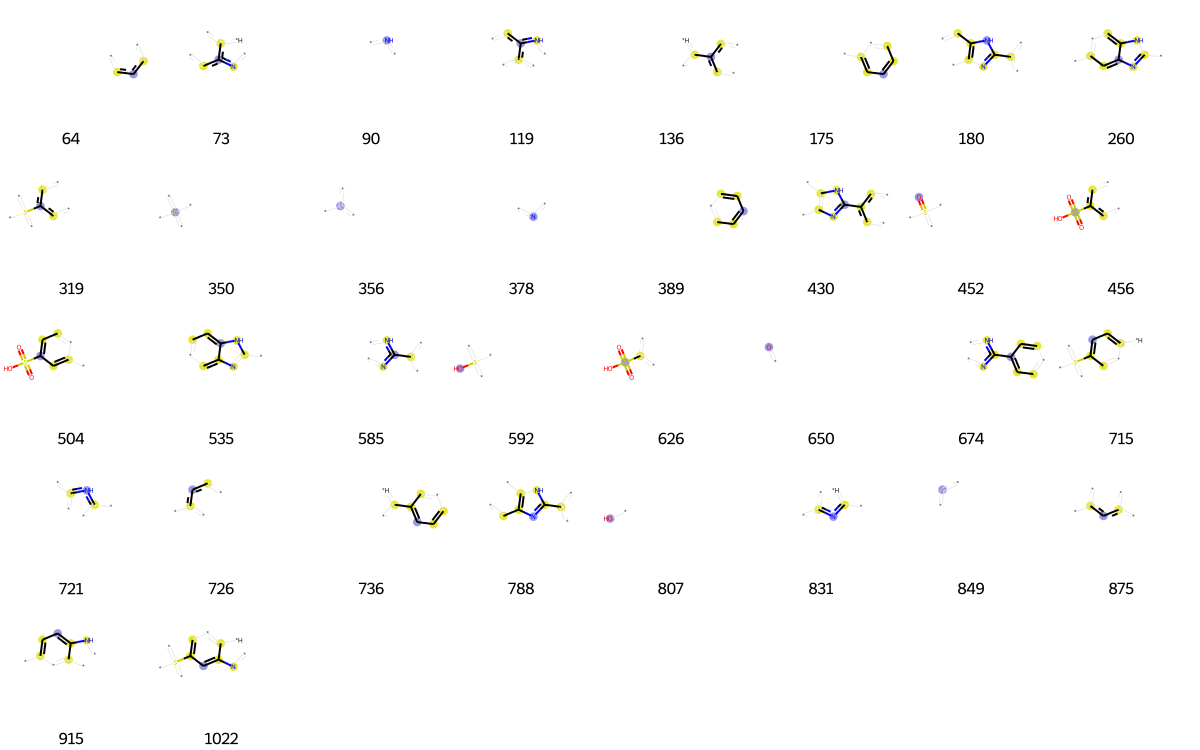

In [222]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [223]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 147,
 220,
 227,
 283,
 315,
 341,
 356,
 451,
 473,
 578,
 583,
 589,
 674,
 726,
 749,
 760,
 786,
 807,
 829,
 849,
 875,
 966]

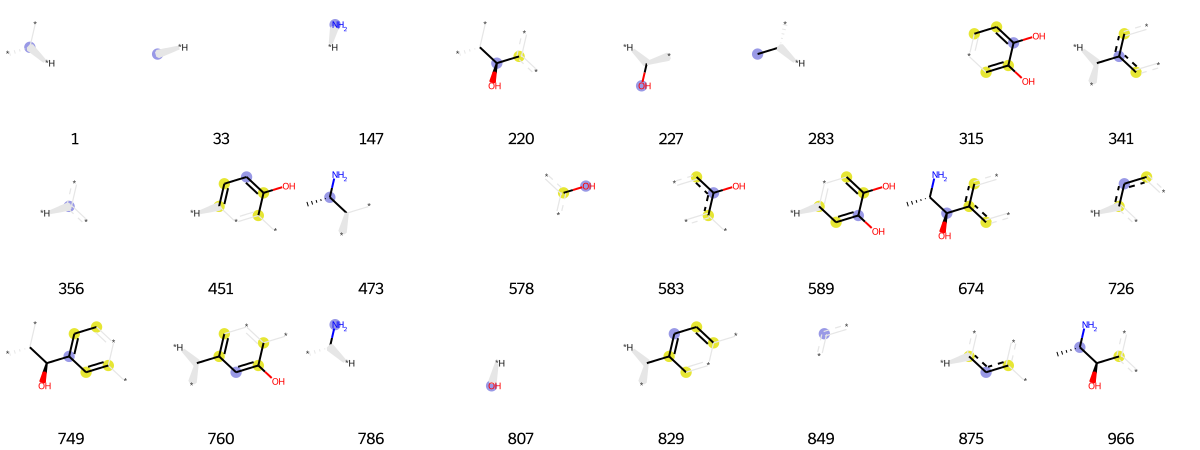

In [224]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [225]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[4,
 56,
 64,
 76,
 80,
 90,
 99,
 128,
 129,
 131,
 172,
 175,
 255,
 284,
 305,
 310,
 356,
 378,
 398,
 428,
 448,
 456,
 492,
 530,
 533,
 603,
 638,
 659,
 724,
 726,
 730,
 741,
 747,
 767,
 784,
 793,
 829,
 842,
 849,
 897,
 926,
 935,
 996,
 1004]

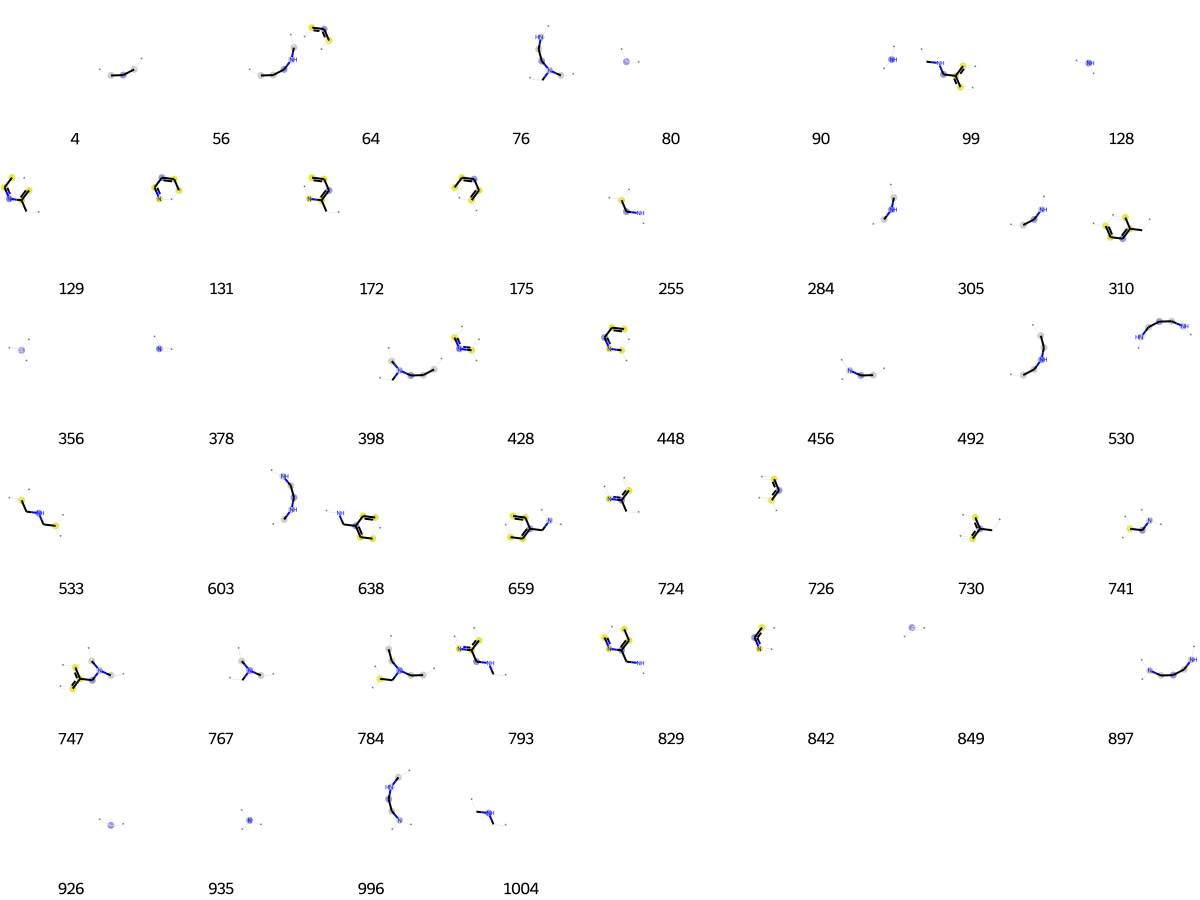

In [226]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [227]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[19,
 36,
 64,
 90,
 119,
 133,
 155,
 275,
 314,
 323,
 324,
 333,
 356,
 361,
 378,
 394,
 428,
 446,
 448,
 540,
 549,
 551,
 571,
 581,
 607,
 622,
 647,
 650,
 653,
 688,
 706,
 721,
 726,
 728,
 766,
 842,
 849,
 875,
 909,
 915,
 926,
 958,
 992]

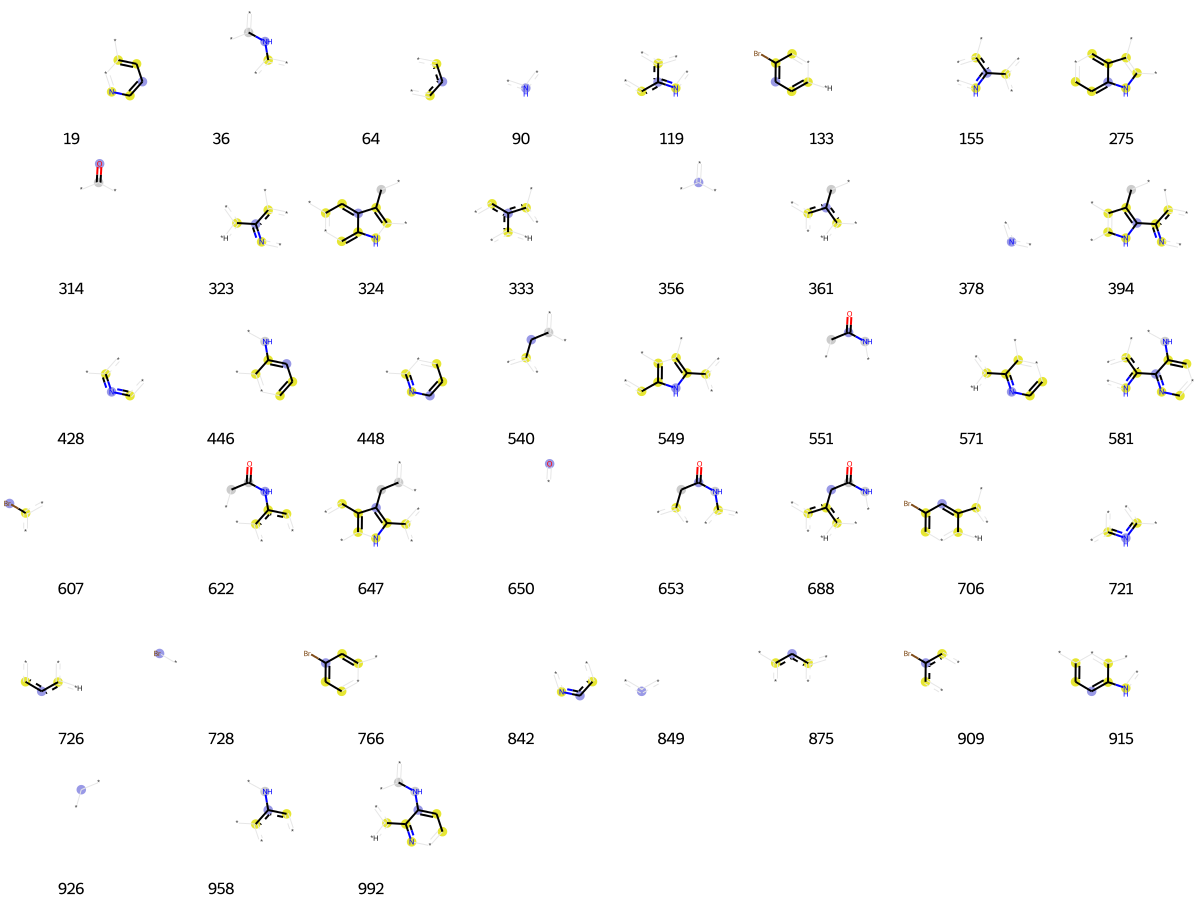

In [228]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [229]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 4,
 33,
 36,
 53,
 55,
 61,
 104,
 121,
 138,
 184,
 212,
 223,
 237,
 250,
 283,
 301,
 350,
 356,
 360,
 389,
 392,
 452,
 478,
 533,
 551,
 583,
 592,
 598,
 626,
 650,
 664,
 670,
 713,
 714,
 724,
 807,
 836,
 849,
 860,
 875,
 893,
 926,
 956,
 975,
 1004,
 1019,
 1022]

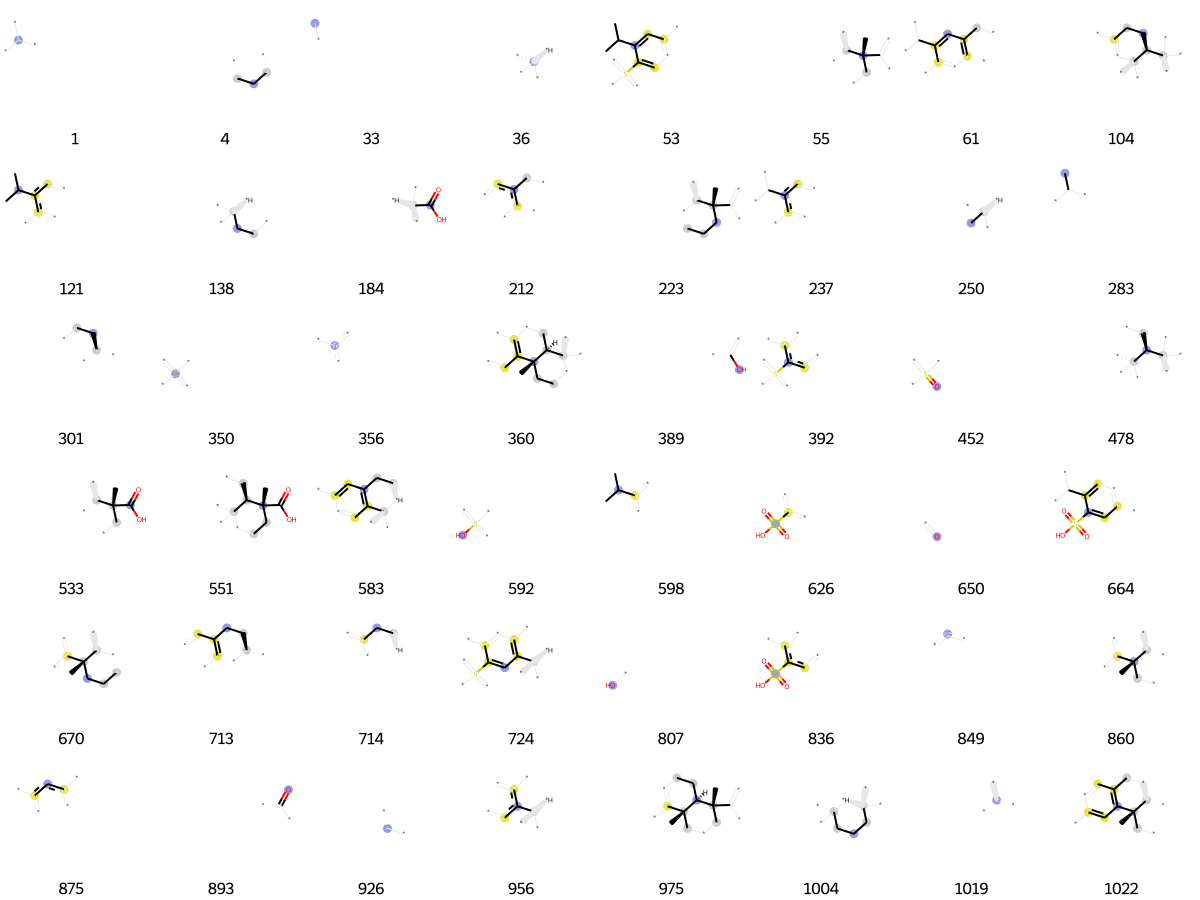

In [230]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [231]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[4,
 12,
 13,
 36,
 67,
 90,
 95,
 122,
 128,
 130,
 199,
 200,
 216,
 264,
 301,
 305,
 325,
 327,
 330,
 356,
 362,
 381,
 396,
 421,
 459,
 470,
 475,
 480,
 483,
 491,
 507,
 531,
 570,
 574,
 602,
 626,
 650,
 661,
 699,
 701,
 726,
 807,
 816,
 832,
 849,
 875,
 888,
 890,
 891,
 893,
 904,
 926,
 935,
 947,
 967,
 985,
 1019]

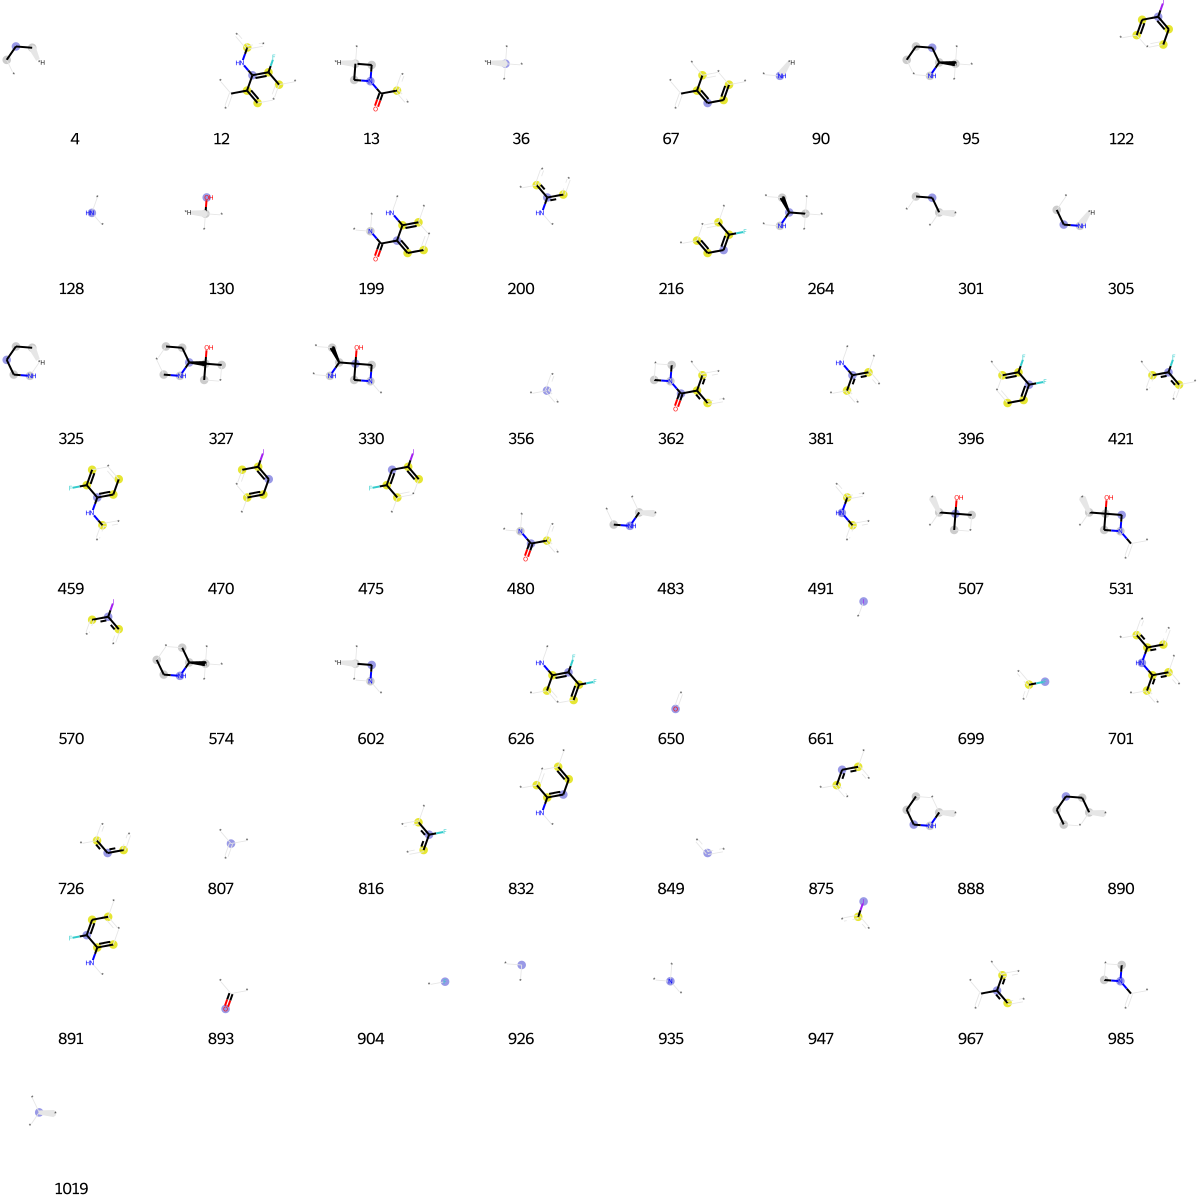

In [232]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [233]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[4,
 33,
 90,
 94,
 99,
 128,
 185,
 198,
 200,
 216,
 231,
 246,
 249,
 271,
 284,
 305,
 319,
 333,
 350,
 356,
 366,
 407,
 452,
 456,
 492,
 502,
 512,
 561,
 575,
 650,
 659,
 688,
 689,
 695,
 715,
 723,
 726,
 766,
 804,
 841,
 849,
 875,
 915,
 926,
 935,
 946,
 996,
 1002,
 1011,
 1021]

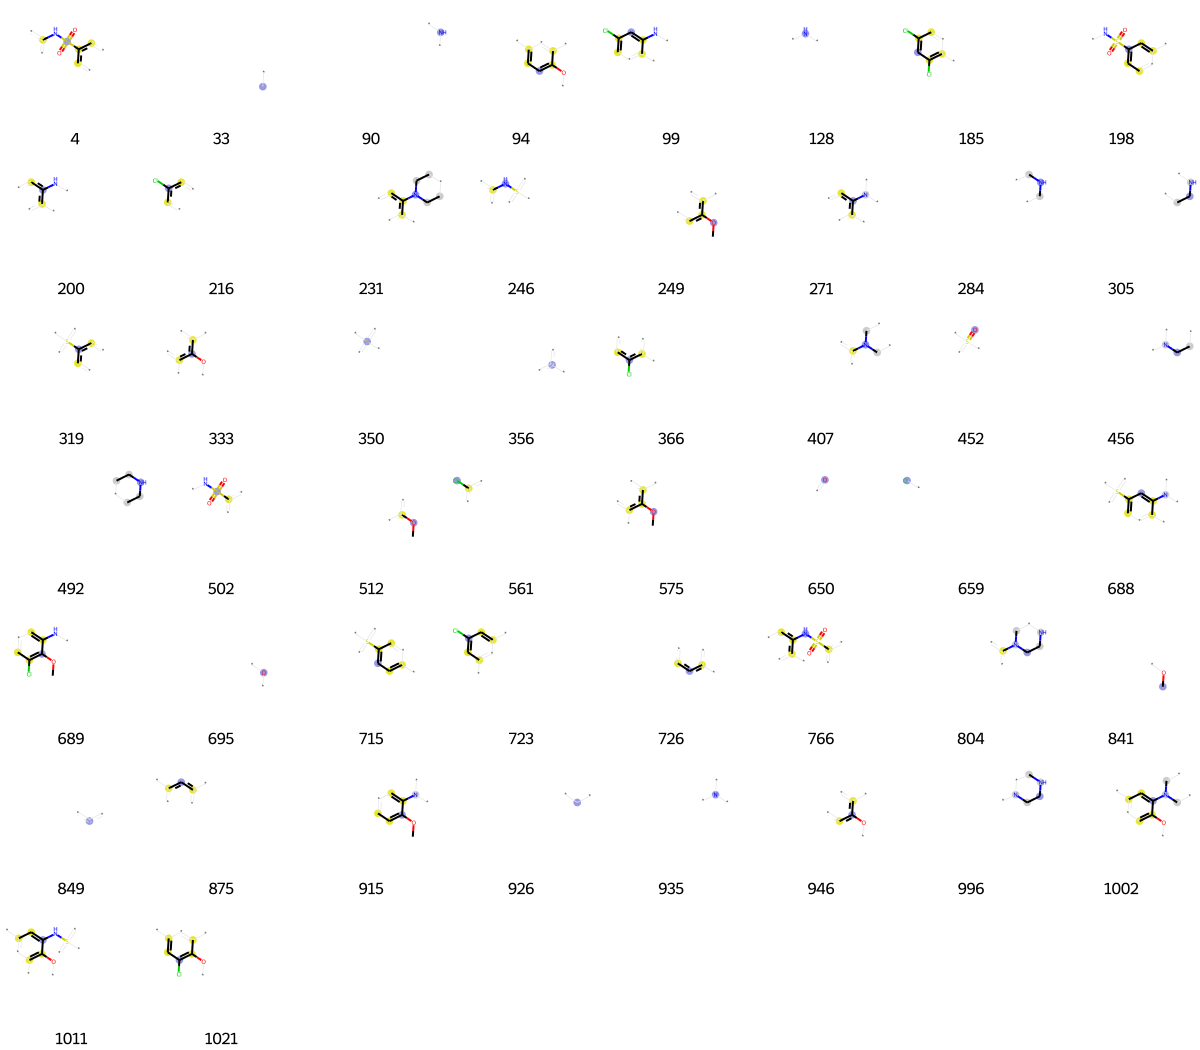

In [234]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [235]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[80,
 164,
 222,
 233,
 314,
 318,
 356,
 370,
 418,
 463,
 492,
 523,
 610,
 649,
 650,
 656,
 740,
 750,
 807,
 820,
 941,
 1019]

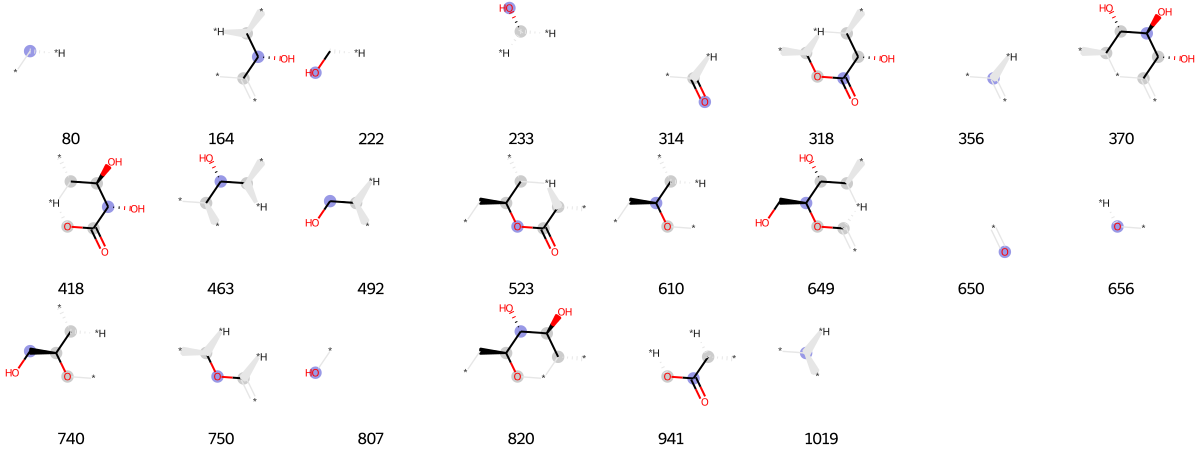

In [236]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [237]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 33,
 80,
 121,
 128,
 136,
 147,
 194,
 248,
 255,
 267,
 283,
 310,
 319,
 323,
 350,
 356,
 362,
 378,
 403,
 406,
 428,
 433,
 435,
 452,
 511,
 518,
 577,
 591,
 606,
 607,
 638,
 650,
 656,
 660,
 675,
 697,
 702,
 715,
 726,
 730,
 773,
 790,
 816,
 831,
 849,
 875,
 896,
 922,
 940,
 947,
 971,
 977,
 980]

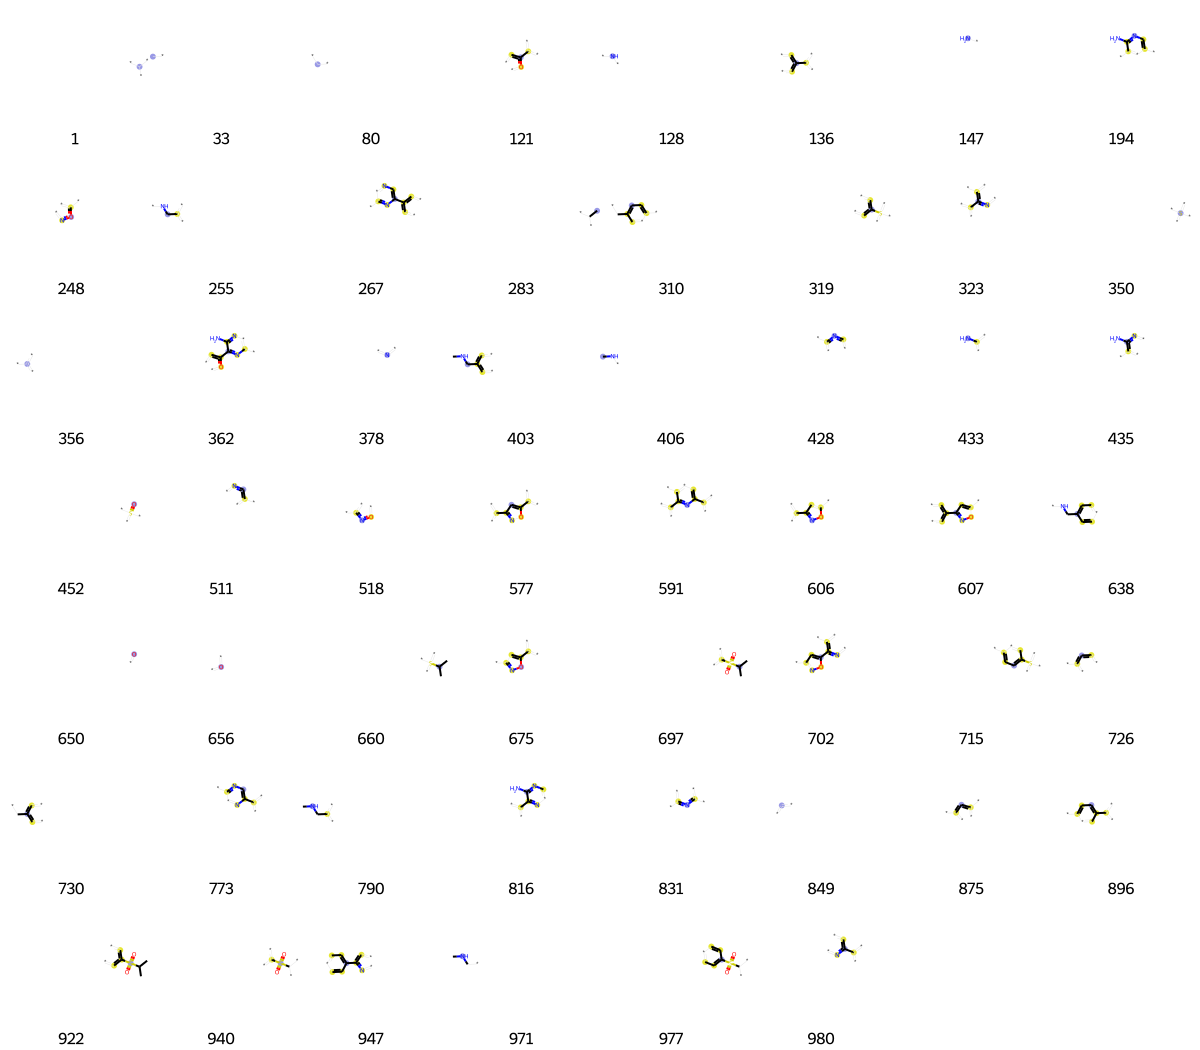

In [238]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [239]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[8,
 15,
 64,
 74,
 80,
 121,
 128,
 175,
 193,
 197,
 212,
 231,
 245,
 259,
 265,
 271,
 352,
 356,
 361,
 366,
 383,
 407,
 433,
 456,
 458,
 484,
 486,
 514,
 526,
 540,
 561,
 590,
 592,
 623,
 650,
 653,
 659,
 667,
 673,
 680,
 684,
 726,
 767,
 807,
 845,
 849,
 852,
 875,
 887,
 893,
 926,
 935,
 956,
 974,
 984,
 1011]

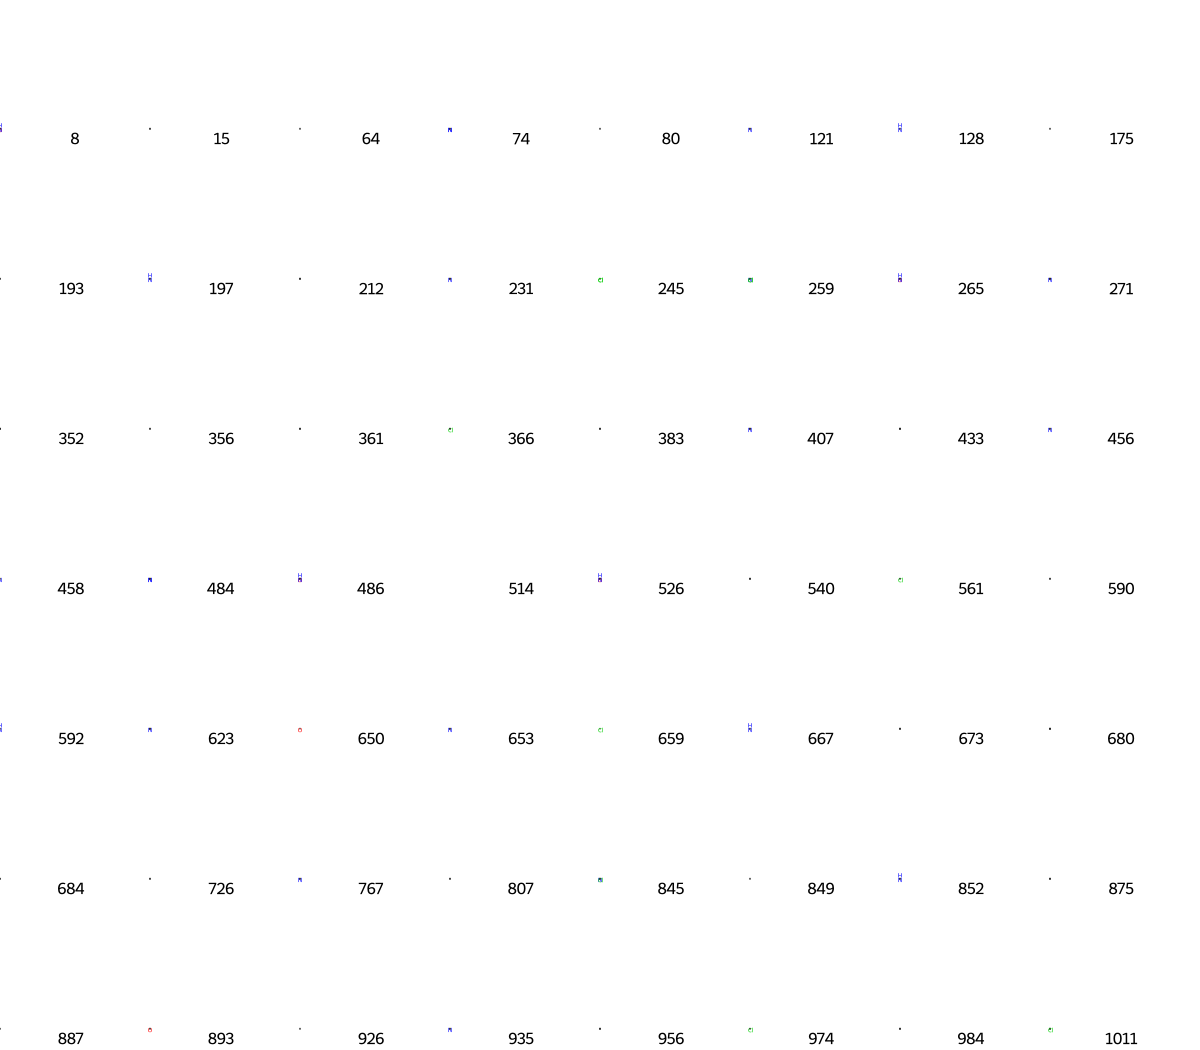

In [240]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [245]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[0,
 15,
 17,
 36,
 64,
 74,
 80,
 90,
 121,
 175,
 212,
 314,
 333,
 338,
 356,
 378,
 440,
 495,
 503,
 527,
 537,
 549,
 554,
 597,
 609,
 642,
 650,
 668,
 684,
 726,
 741,
 750,
 767,
 849,
 872,
 922,
 926,
 927,
 935,
 944,
 960,
 980,
 1007]

In [247]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[0,
 1,
 4,
 11,
 33,
 41,
 42,
 46,
 58,
 64,
 79,
 80,
 81,
 83,
 86,
 90,
 94,
 108,
 116,
 117,
 119,
 121,
 128,
 140,
 143,
 147,
 151,
 158,
 173,
 175,
 188,
 193,
 197,
 222,
 227,
 242,
 259,
 263,
 266,
 274,
 283,
 294,
 301,
 325,
 328,
 333,
 354,
 356,
 364,
 369,
 371,
 376,
 378,
 389,
 394,
 398,
 408,
 416,
 427,
 428,
 436,
 442,
 446,
 456,
 458,
 462,
 482,
 488,
 493,
 506,
 507,
 511,
 520,
 531,
 534,
 540,
 545,
 549,
 551,
 572,
 573,
 575,
 583,
 592,
 594,
 597,
 599,
 609,
 618,
 623,
 624,
 625,
 648,
 650,
 667,
 669,
 680,
 689,
 691,
 695,
 708,
 713,
 719,
 724,
 726,
 728,
 730,
 734,
 736,
 739,
 749,
 752,
 759,
 761,
 763,
 785,
 786,
 799,
 805,
 806,
 807,
 816,
 823,
 825,
 833,
 837,
 849,
 852,
 855,
 857,
 874,
 875,
 887,
 893,
 894,
 913,
 918,
 926,
 931,
 935,
 946,
 953,
 955,
 966,
 981,
 982,
 983,
 989,
 992,
 996,
 1009,
 1015,
 1019]

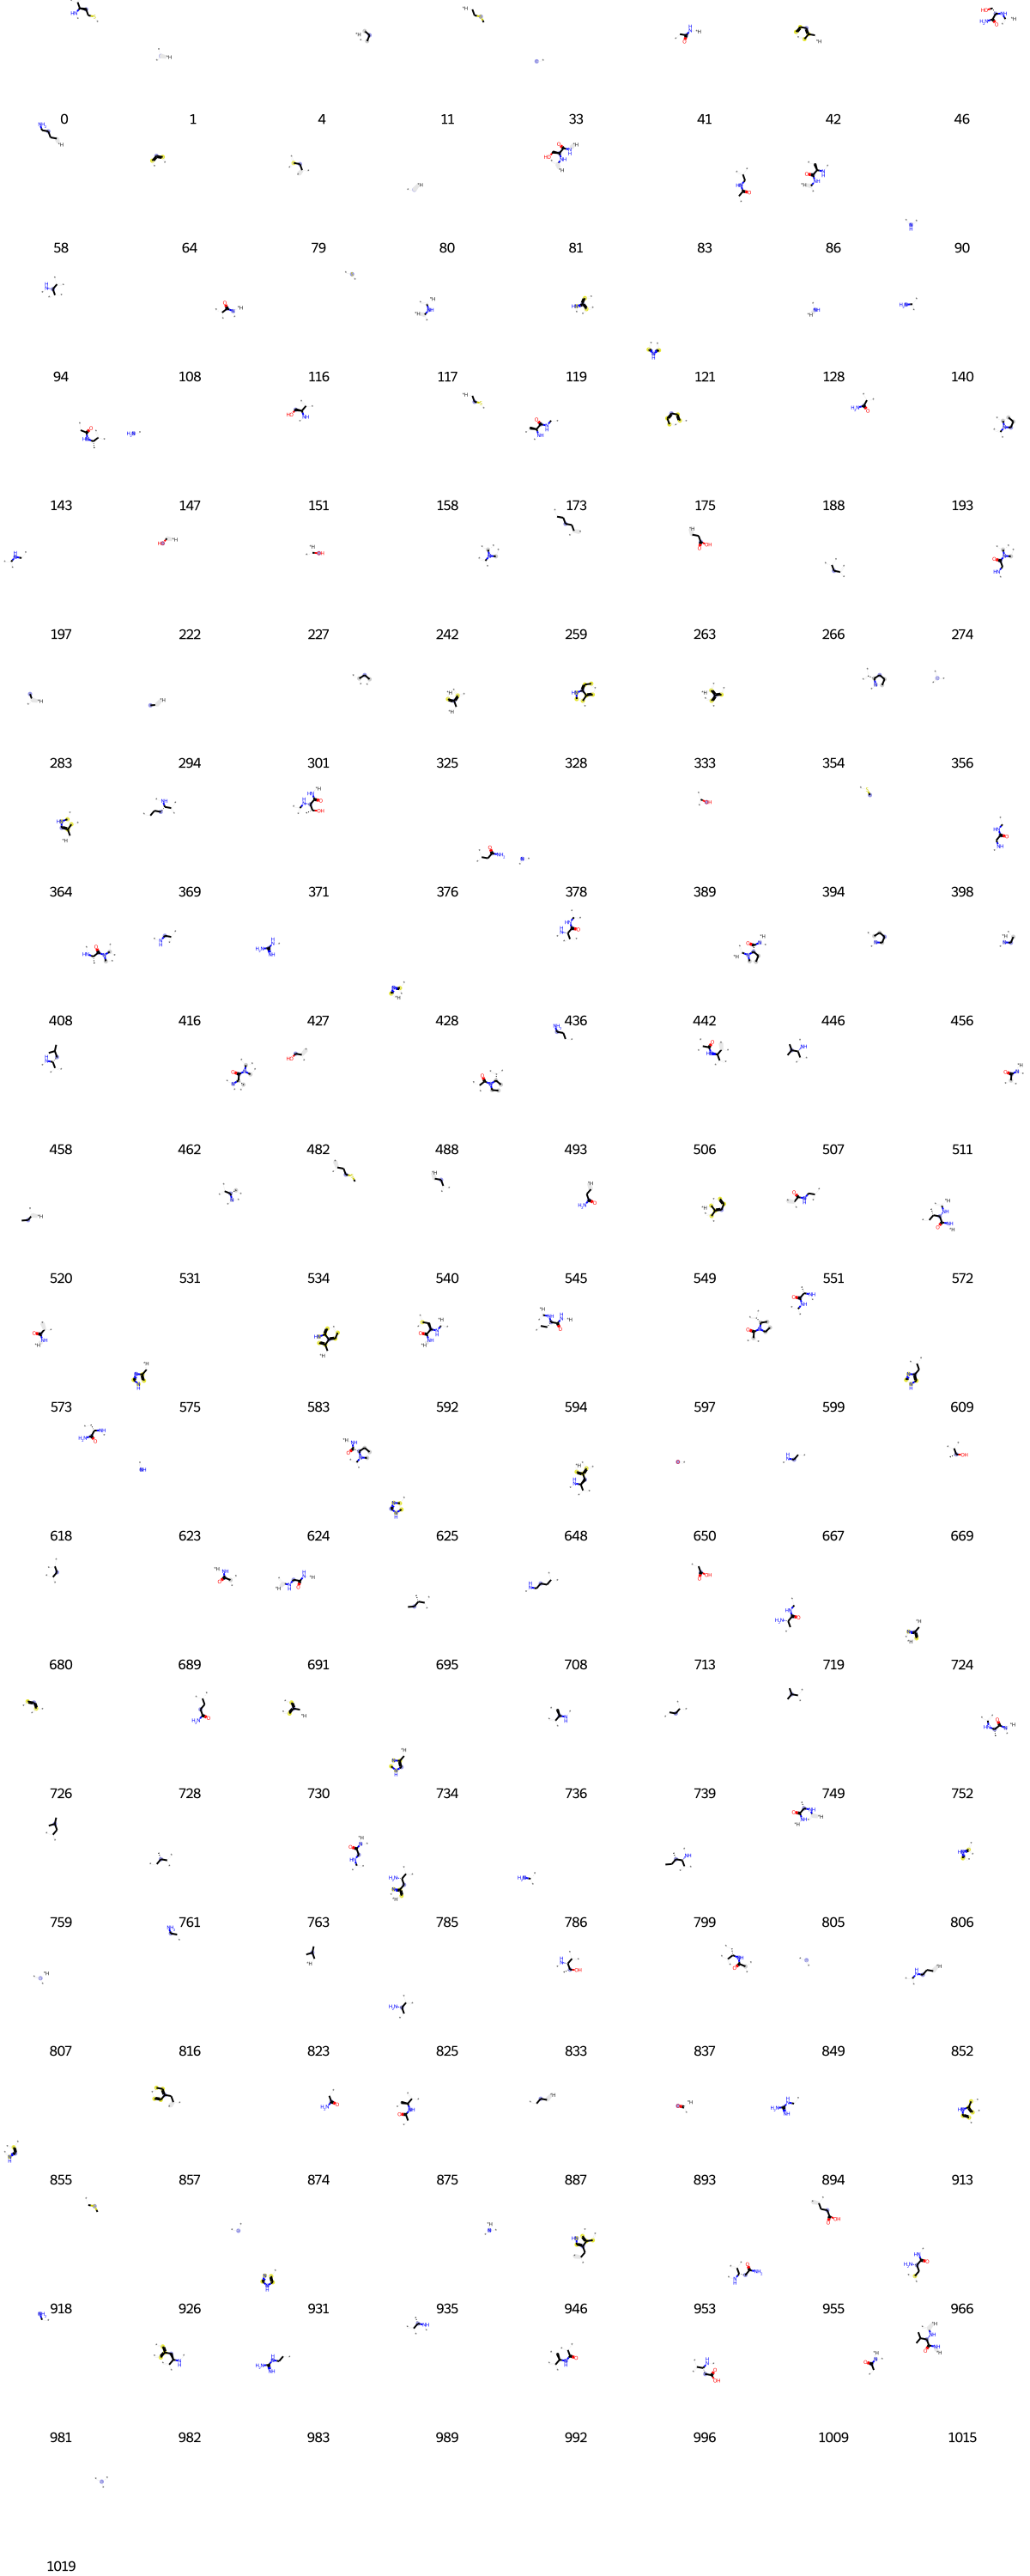

In [248]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [249]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[3,
 5,
 24,
 33,
 80,
 94,
 98,
 132,
 140,
 141,
 192,
 194,
 210,
 249,
 310,
 322,
 326,
 350,
 356,
 435,
 452,
 458,
 486,
 501,
 512,
 594,
 633,
 635,
 650,
 694,
 695,
 726,
 730,
 769,
 781,
 795,
 807,
 814,
 835,
 841,
 849,
 875,
 946,
 975]

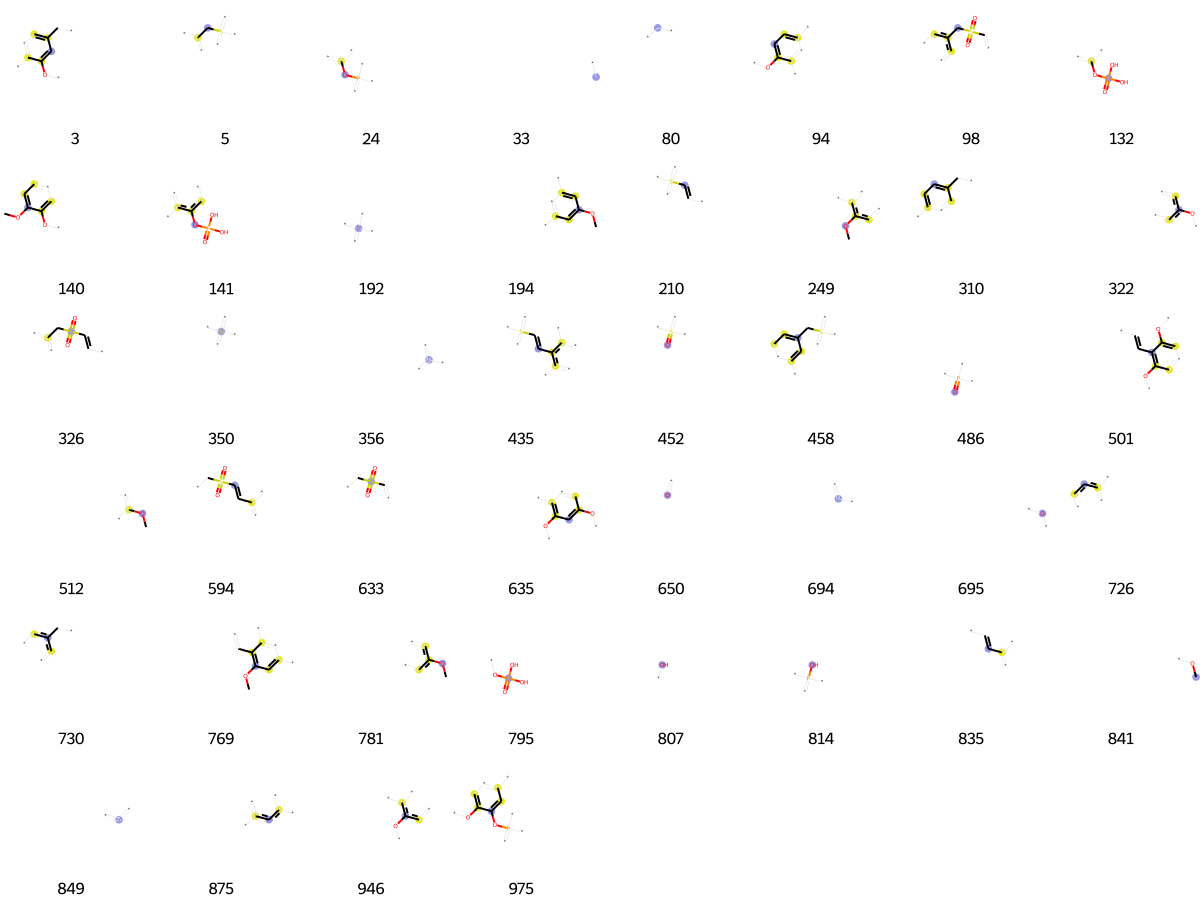

In [250]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [251]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[11,
 15,
 64,
 80,
 128,
 197,
 255,
 310,
 325,
 356,
 366,
 419,
 441,
 466,
 486,
 490,
 549,
 558,
 561,
 586,
 623,
 650,
 656,
 659,
 726,
 730,
 738,
 755,
 776,
 807,
 813,
 839,
 849,
 875,
 881,
 893,
 926,
 974]

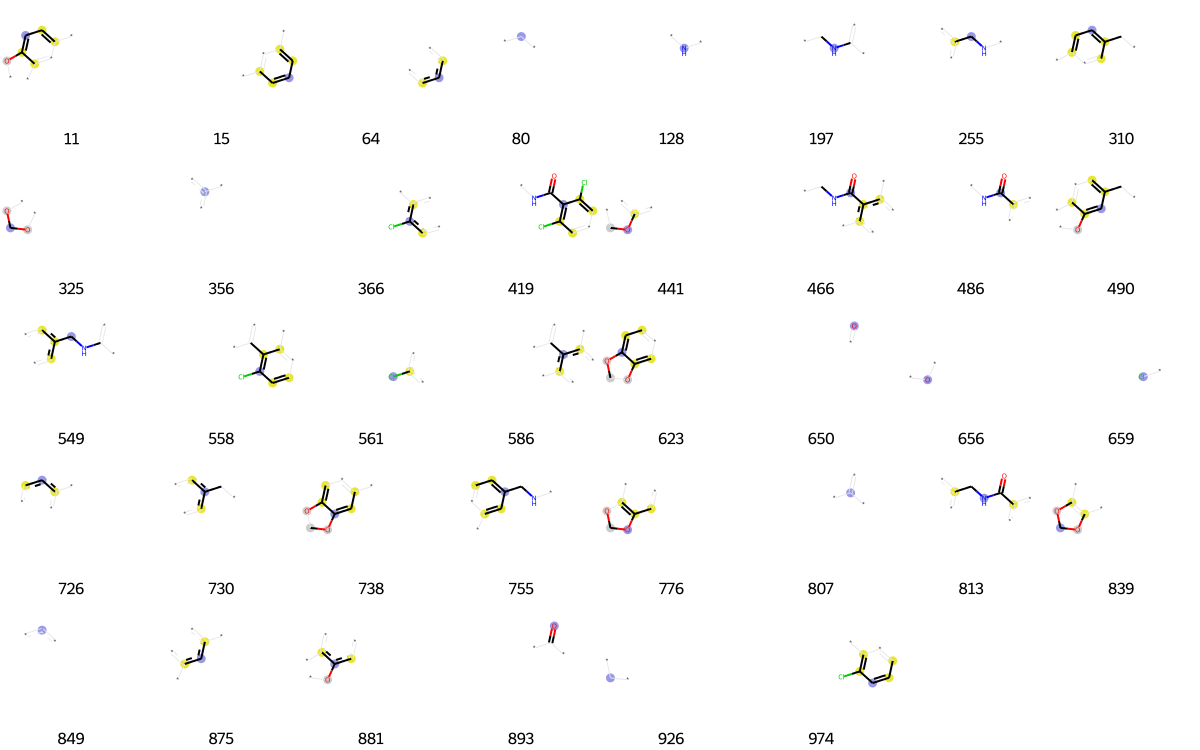

In [252]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [253]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[5,
 33,
 73,
 128,
 133,
 191,
 202,
 221,
 249,
 329,
 333,
 343,
 356,
 378,
 428,
 451,
 486,
 489,
 491,
 512,
 578,
 583,
 607,
 624,
 673,
 695,
 708,
 726,
 728,
 735,
 780,
 786,
 794,
 807,
 833,
 841,
 843,
 849,
 875,
 888,
 946]

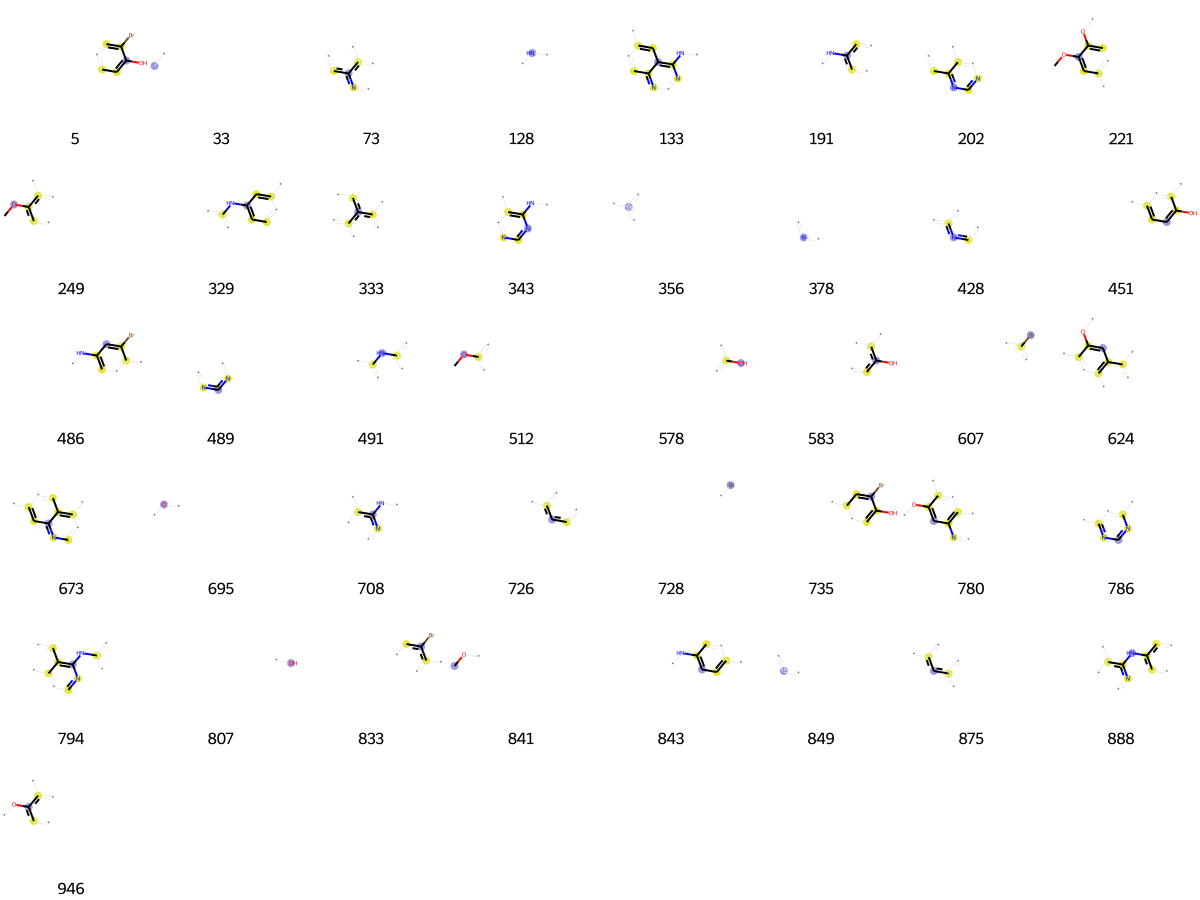

In [254]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [255]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[19,
 28,
 64,
 88,
 202,
 333,
 344,
 356,
 366,
 378,
 428,
 435,
 448,
 549,
 561,
 578,
 582,
 659,
 661,
 700,
 726,
 787,
 807,
 842,
 849,
 875,
 915,
 947,
 1021]

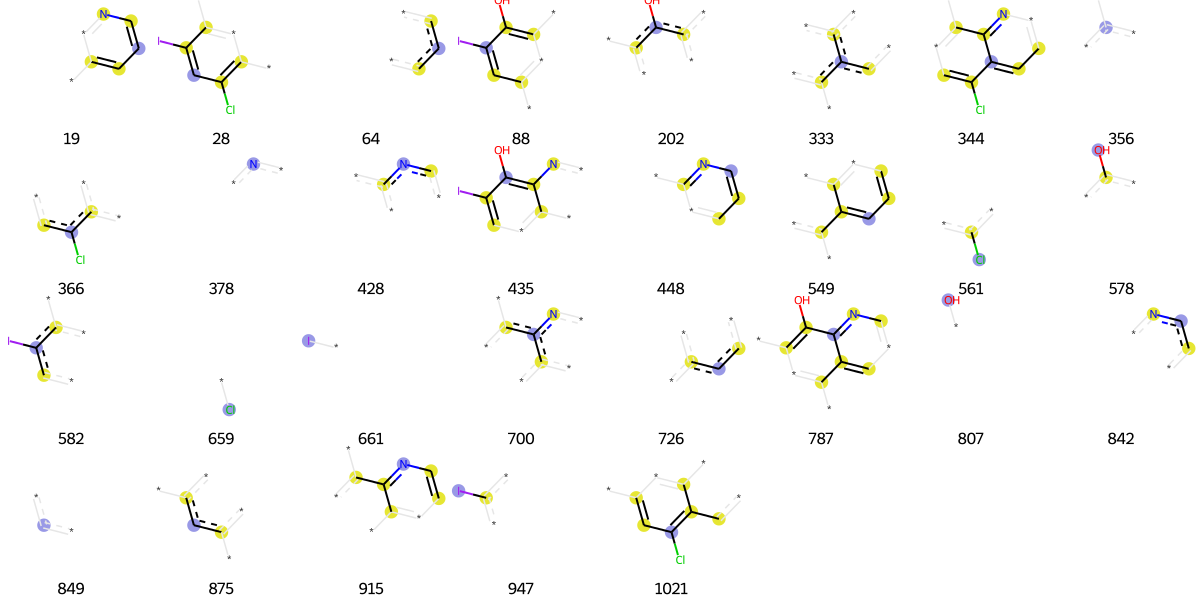

In [256]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [257]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[5,
 6,
 11,
 33,
 36,
 55,
 97,
 102,
 130,
 138,
 144,
 159,
 208,
 233,
 250,
 301,
 314,
 342,
 356,
 463,
 521,
 522,
 527,
 531,
 563,
 621,
 650,
 656,
 694,
 695,
 706,
 725,
 733,
 760,
 768,
 788,
 804,
 807,
 831,
 860,
 890,
 893,
 916,
 919,
 926,
 940,
 946,
 967,
 1017,
 1019]

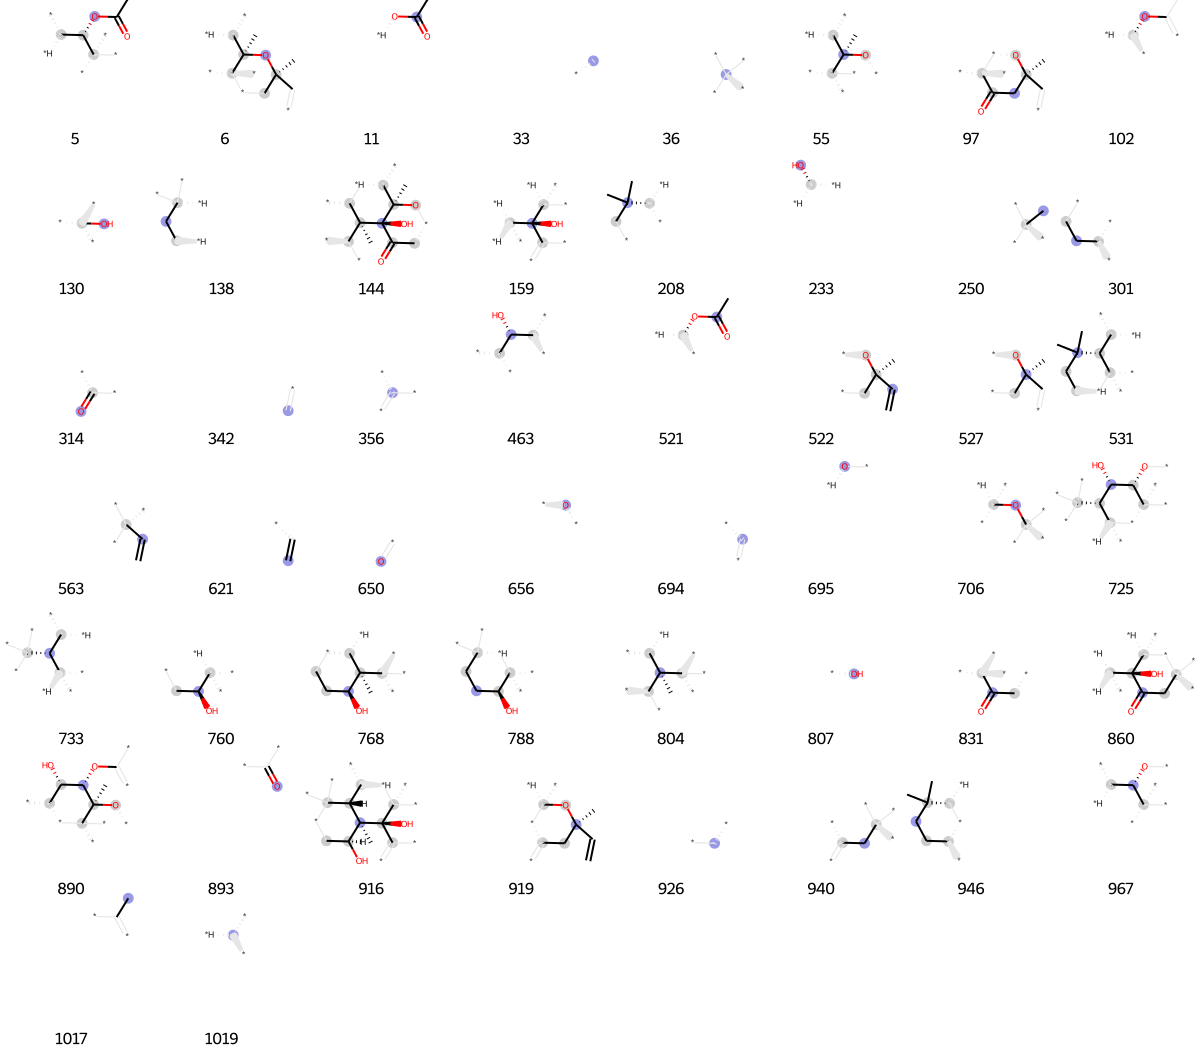

In [258]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [262]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 4,
 20,
 33,
 45,
 46,
 58,
 64,
 73,
 118,
 128,
 175,
 191,
 200,
 216,
 233,
 261,
 283,
 287,
 289,
 321,
 335,
 356,
 357,
 378,
 419,
 485,
 491,
 500,
 530,
 561,
 623,
 659,
 668,
 725,
 726,
 737,
 801,
 816,
 819,
 831,
 843,
 849,
 863,
 875,
 892,
 935,
 969,
 980,
 1003]

In [264]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 73,
 80,
 90,
 116,
 119,
 181,
 202,
 218,
 252,
 286,
 322,
 333,
 341,
 343,
 356,
 367,
 373,
 378,
 428,
 511,
 512,
 516,
 575,
 695,
 698,
 700,
 718,
 721,
 722,
 726,
 752,
 762,
 781,
 831,
 834,
 841,
 849,
 873,
 875,
 938,
 944,
 948,
 951,
 954,
 961]

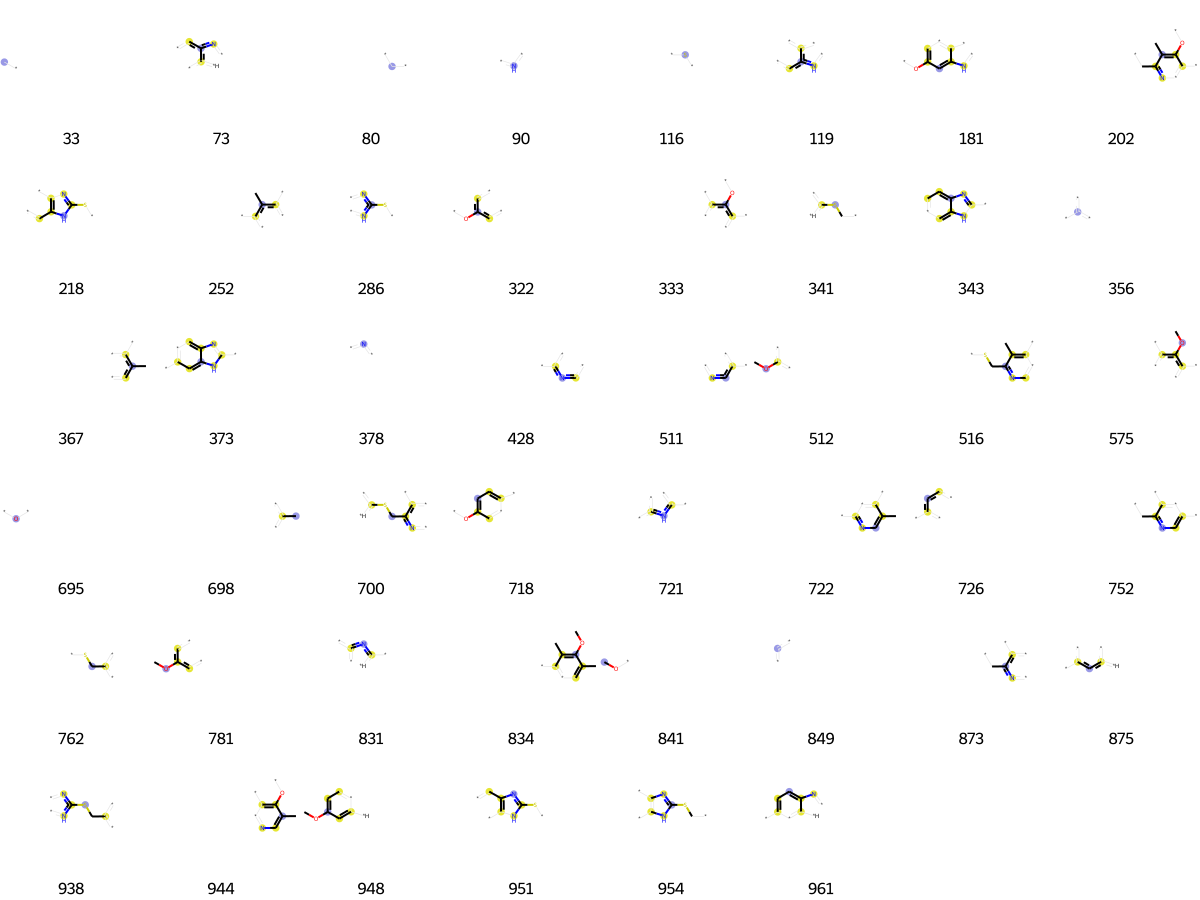

In [265]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [266]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[2,
 4,
 29,
 33,
 34,
 45,
 48,
 55,
 64,
 80,
 87,
 175,
 214,
 222,
 260,
 261,
 294,
 301,
 314,
 356,
 456,
 484,
 502,
 528,
 650,
 714,
 726,
 764,
 767,
 771,
 781,
 785,
 802,
 807,
 836,
 837,
 839,
 849,
 850,
 851,
 872,
 890,
 908,
 911,
 922,
 926,
 935,
 969,
 1010,
 1019]

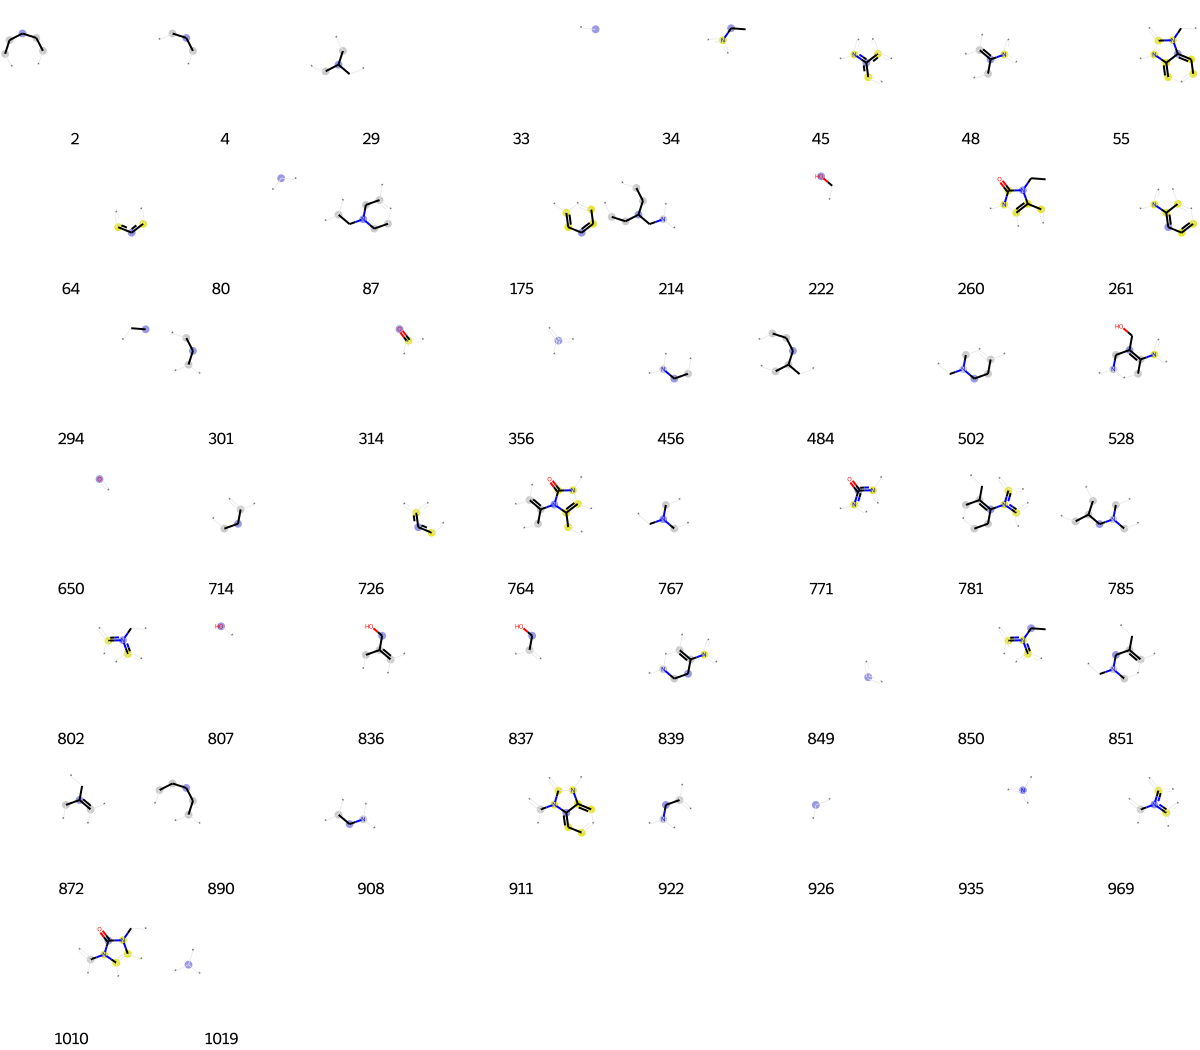

In [267]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [268]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 4,
 5,
 10,
 33,
 67,
 90,
 115,
 121,
 126,
 128,
 133,
 147,
 174,
 206,
 231,
 233,
 252,
 253,
 267,
 272,
 275,
 283,
 285,
 288,
 291,
 296,
 301,
 306,
 314,
 323,
 349,
 356,
 367,
 370,
 378,
 379,
 380,
 387,
 433,
 446,
 456,
 482,
 486,
 492,
 507,
 513,
 525,
 526,
 539,
 550,
 552,
 580,
 586,
 622,
 634,
 650,
 656,
 667,
 669,
 684,
 685,
 698,
 700,
 715,
 722,
 726,
 750,
 780,
 798,
 807,
 831,
 849,
 855,
 878,
 888,
 893,
 909,
 922,
 926,
 927,
 935,
 936,
 941,
 967,
 975,
 979,
 1004,
 1019]

In [270]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[8,
 33,
 73,
 119,
 121,
 128,
 144,
 169,
 182,
 191,
 202,
 207,
 212,
 216,
 301,
 329,
 343,
 350,
 356,
 366,
 378,
 428,
 456,
 464,
 465,
 489,
 491,
 511,
 544,
 557,
 558,
 561,
 565,
 610,
 659,
 699,
 700,
 708,
 726,
 786,
 816,
 831,
 843,
 849,
 875,
 888,
 904,
 926,
 935,
 940,
 993,
 1008,
 1019]

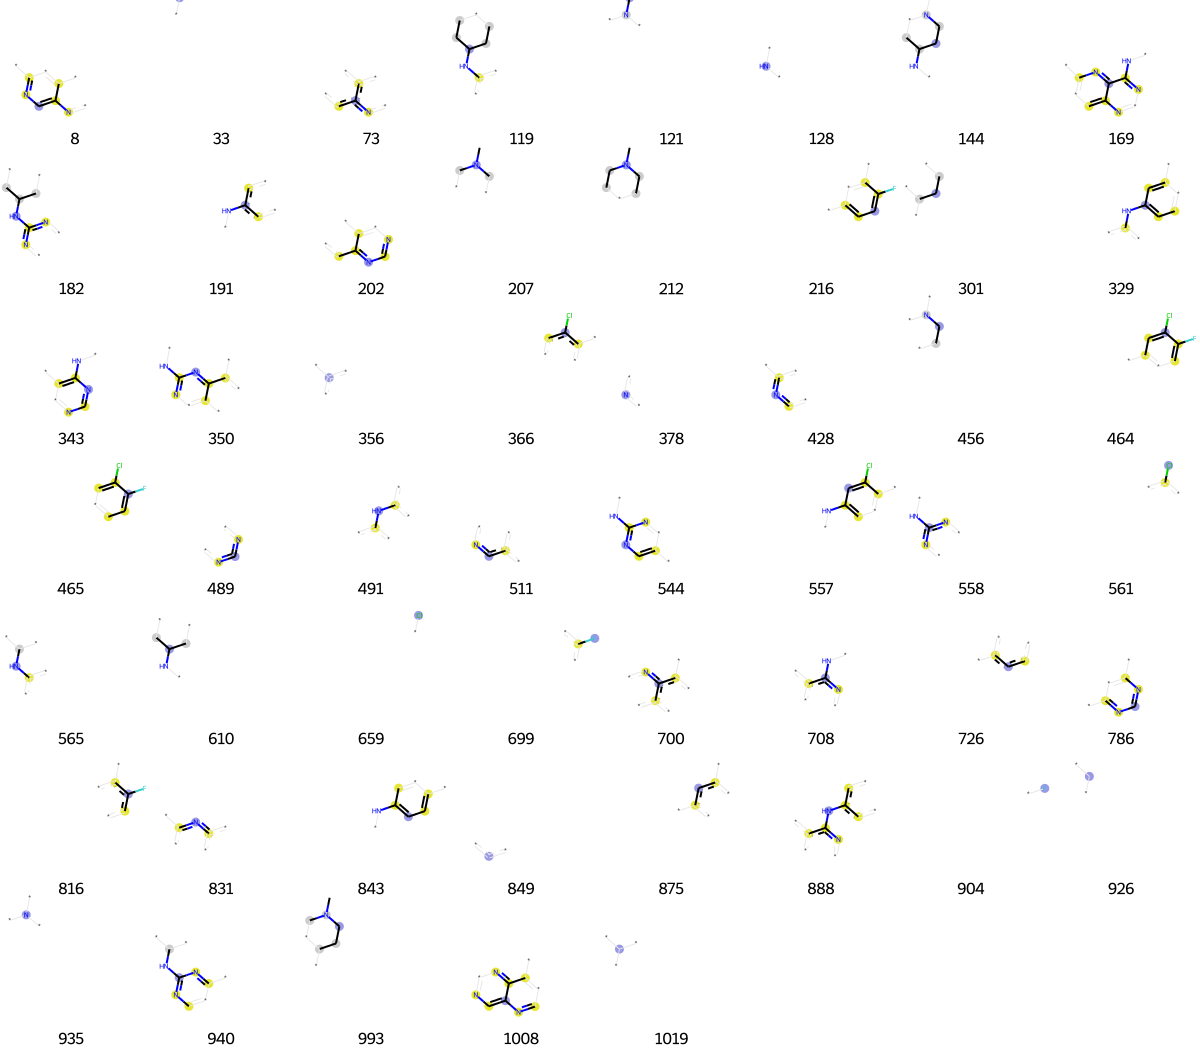

In [271]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [272]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[147,
 151,
 173,
 279,
 317,
 319,
 350,
 356,
 366,
 392,
 452,
 532,
 561,
 583,
 650,
 659,
 691,
 827,
 833,
 849,
 875,
 1011]

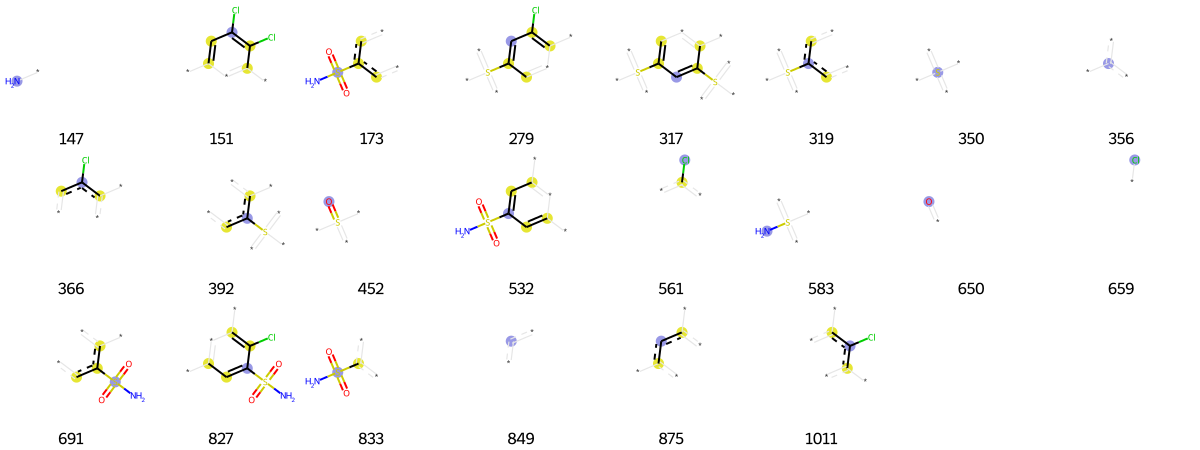

In [273]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [274]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[16,
 64,
 102,
 117,
 150,
 157,
 167,
 228,
 231,
 233,
 255,
 270,
 315,
 356,
 361,
 416,
 429,
 451,
 463,
 486,
 496,
 513,
 529,
 578,
 583,
 589,
 608,
 624,
 648,
 656,
 726,
 745,
 750,
 751,
 779,
 807,
 848,
 849,
 855,
 858,
 875,
 881,
 895,
 926,
 1014,
 1019]

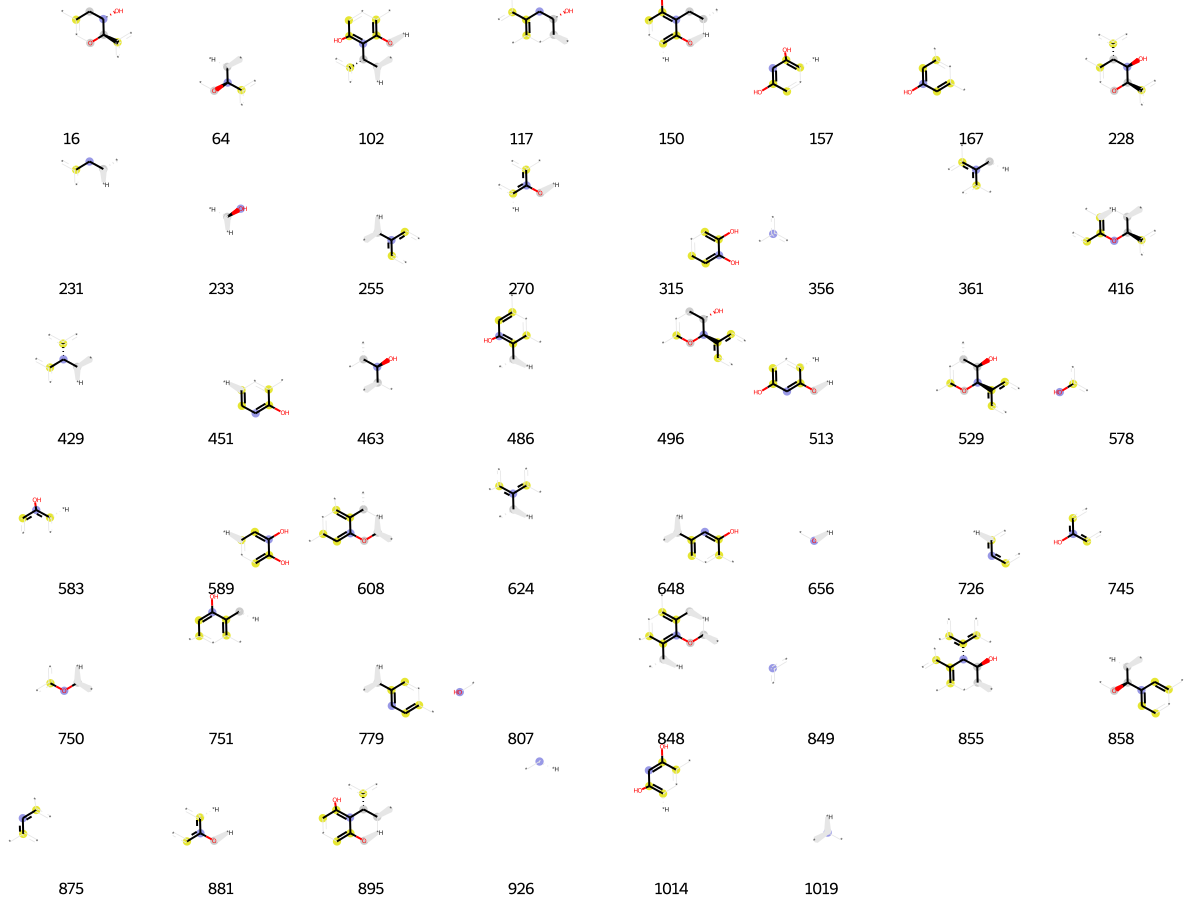

In [275]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [276]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 37,
 64,
 87,
 90,
 128,
 136,
 139,
 142,
 146,
 175,
 197,
 249,
 257,
 288,
 333,
 352,
 356,
 361,
 378,
 386,
 428,
 439,
 463,
 477,
 486,
 502,
 503,
 511,
 512,
 579,
 629,
 650,
 695,
 710,
 714,
 726,
 789,
 806,
 807,
 841,
 849,
 855,
 856,
 875,
 881,
 893,
 938,
 946,
 984]

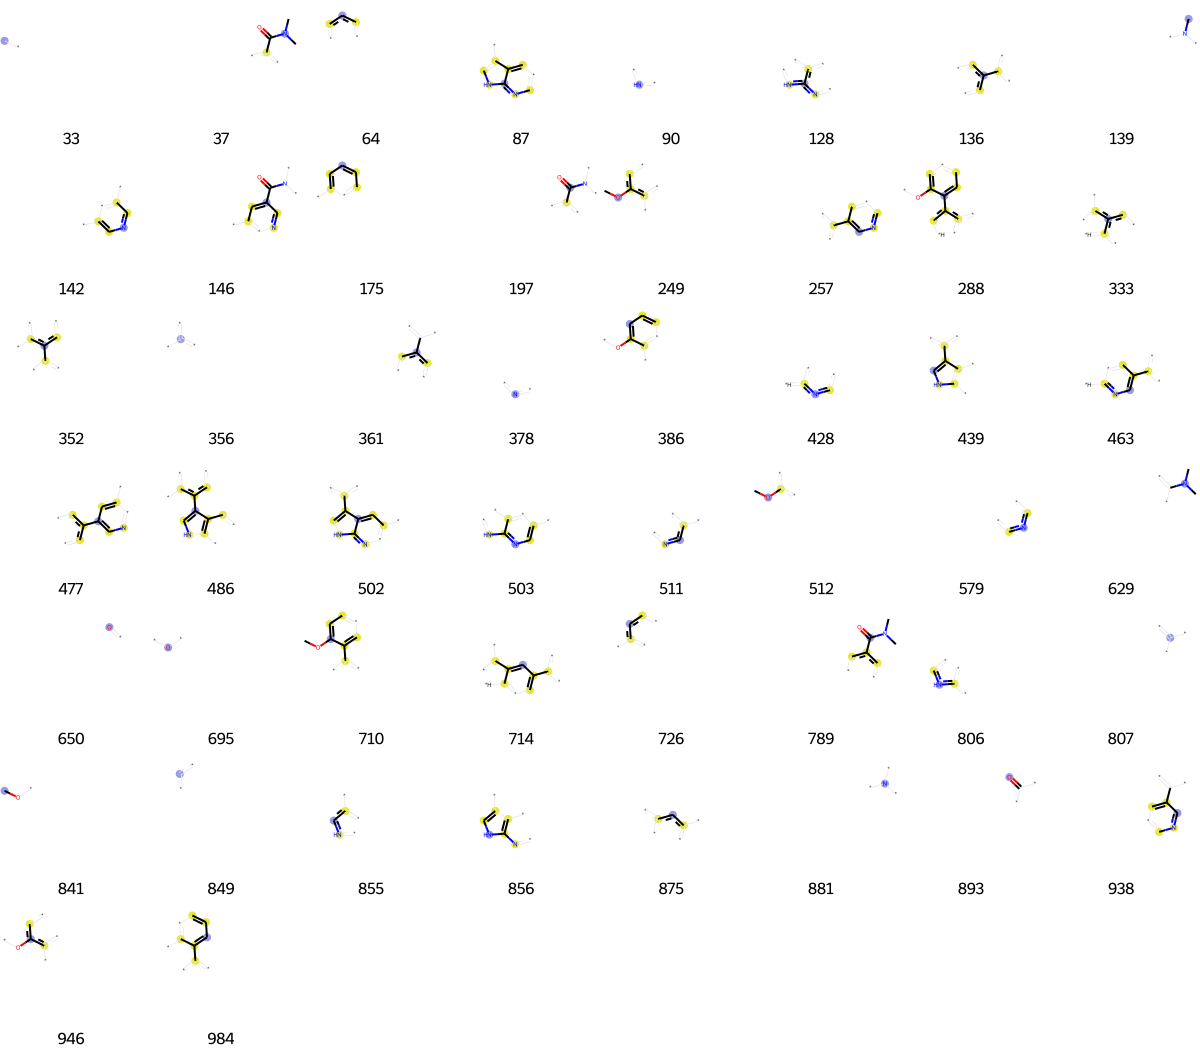

In [277]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [278]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[9,
 20,
 27,
 33,
 36,
 64,
 67,
 80,
 102,
 110,
 114,
 119,
 128,
 140,
 147,
 149,
 194,
 200,
 214,
 233,
 250,
 260,
 277,
 281,
 301,
 309,
 314,
 356,
 362,
 378,
 386,
 398,
 429,
 463,
 524,
 549,
 553,
 565,
 610,
 612,
 650,
 683,
 695,
 723,
 726,
 735,
 751,
 771,
 801,
 807,
 809,
 828,
 849,
 875,
 886,
 893,
 904,
 910,
 924,
 926,
 932,
 935,
 940,
 967,
 976,
 981,
 1019]

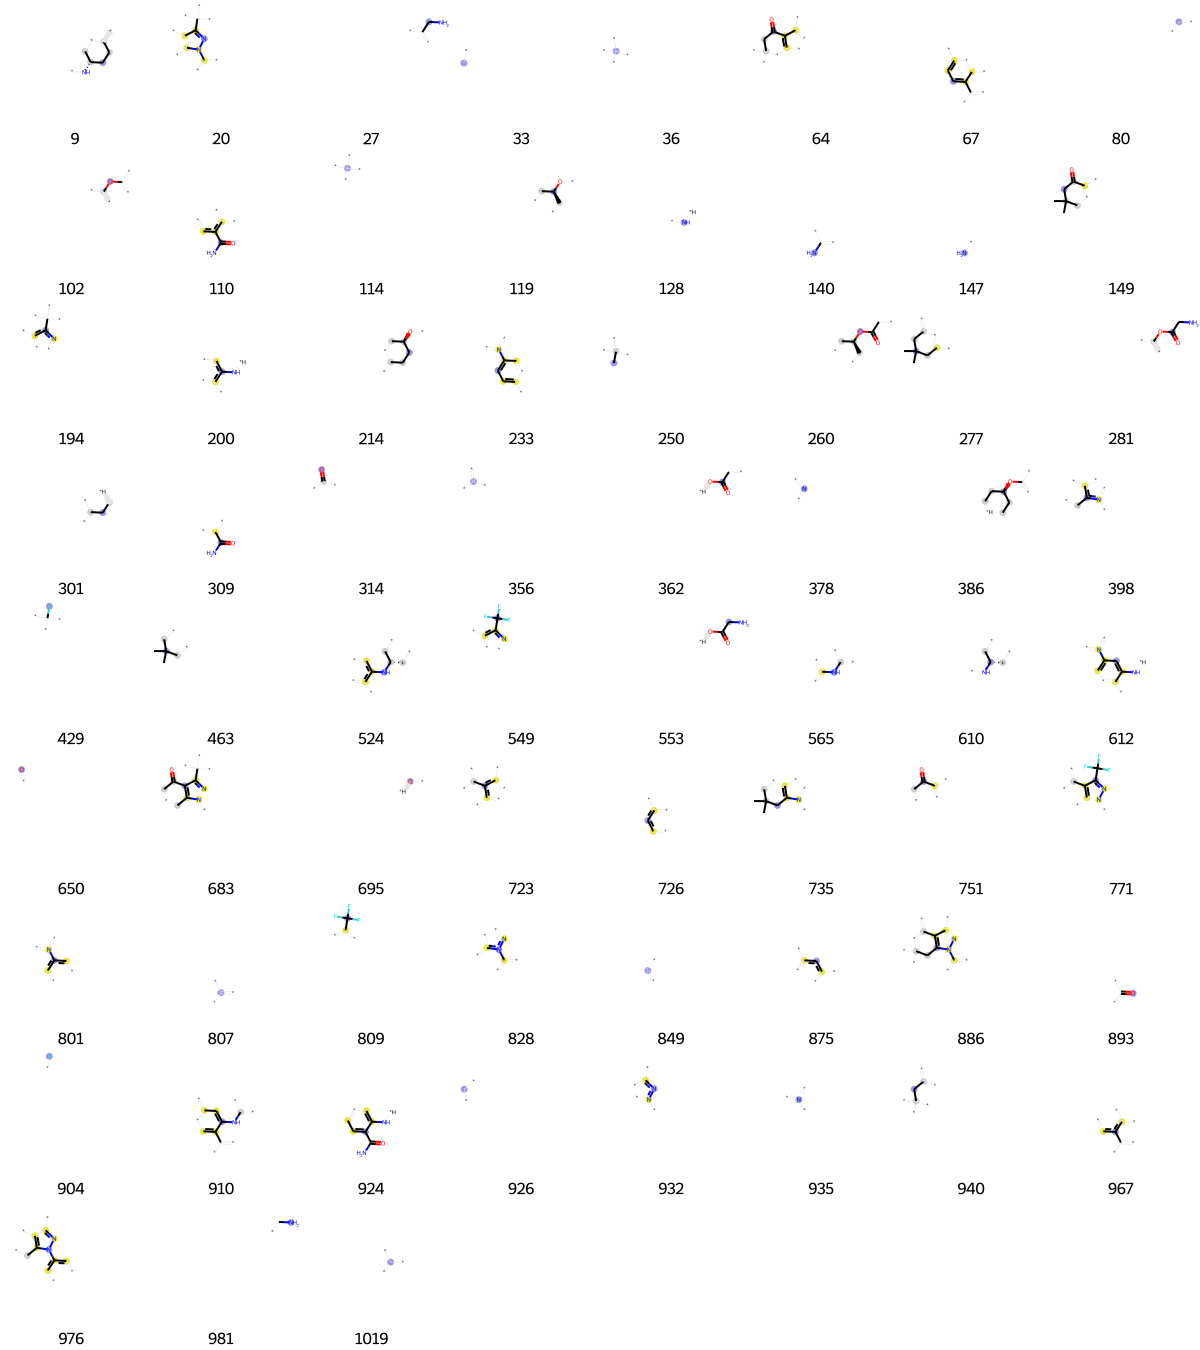

In [279]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [280]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 8,
 13,
 14,
 33,
 59,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 139,
 140,
 144,
 207,
 212,
 221,
 232,
 249,
 274,
 301,
 315,
 333,
 335,
 356,
 378,
 407,
 428,
 456,
 484,
 494,
 512,
 565,
 610,
 624,
 625,
 644,
 652,
 676,
 680,
 691,
 693,
 695,
 708,
 747,
 780,
 831,
 834,
 841,
 849,
 875,
 881,
 891,
 926,
 927,
 935,
 946,
 968,
 993,
 1018,
 1019]

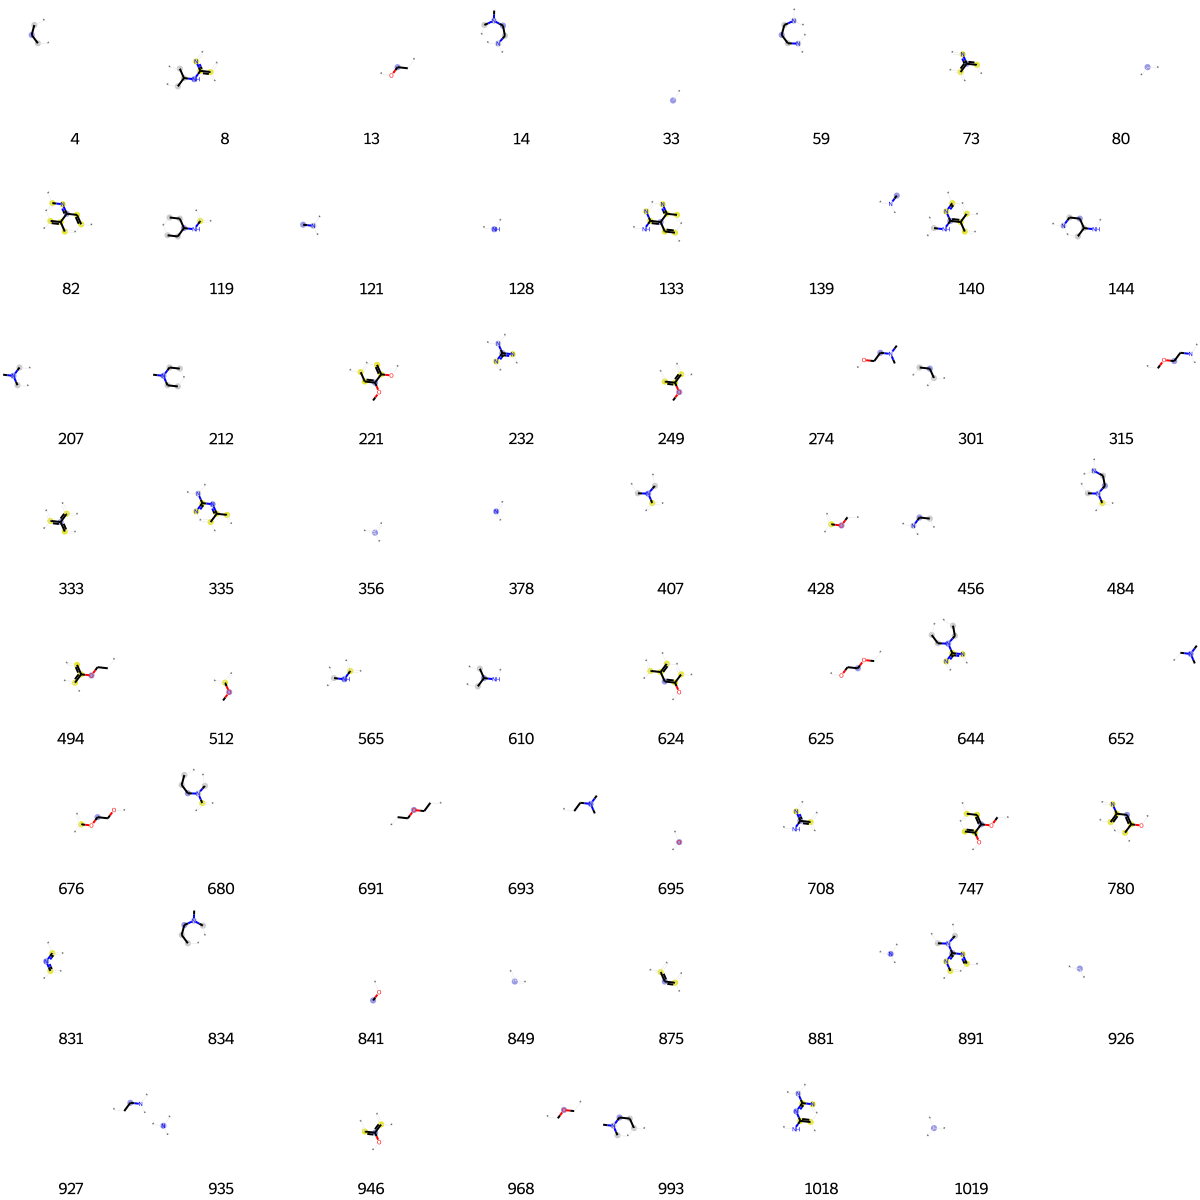

In [281]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [282]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 33,
 43,
 54,
 62,
 84,
 111,
 119,
 123,
 124,
 130,
 137,
 162,
 178,
 193,
 214,
 285,
 296,
 301,
 310,
 324,
 346,
 356,
 389,
 438,
 456,
 590,
 650,
 675,
 695,
 714,
 757,
 781,
 794,
 807,
 809,
 841,
 845,
 849,
 874,
 875,
 881,
 893,
 898,
 904,
 926,
 937,
 953,
 973,
 974,
 994,
 995,
 1002,
 1013,
 1014,
 1019]

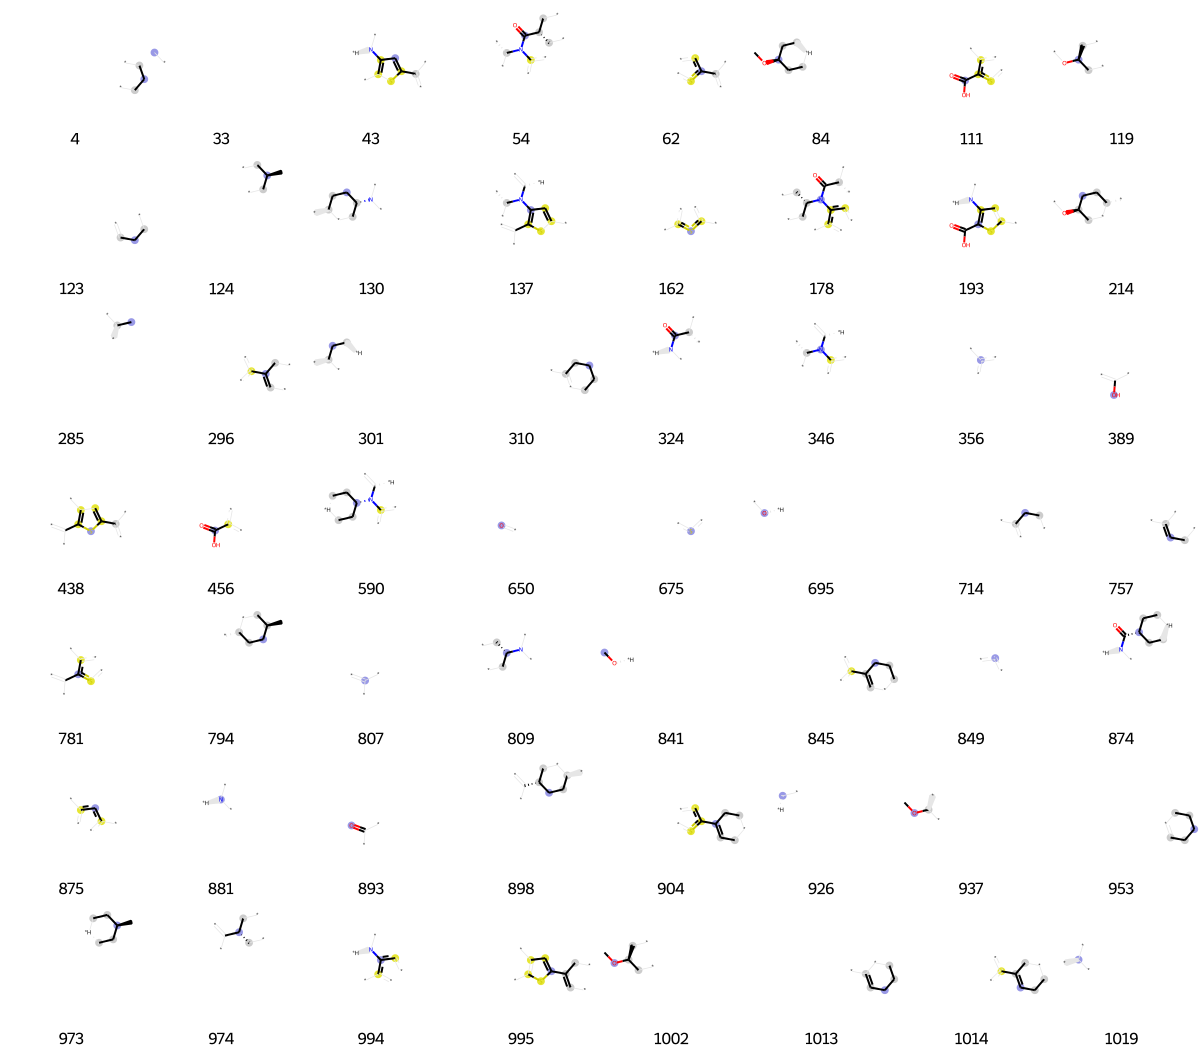

In [283]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [284]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 15,
 33,
 43,
 64,
 77,
 80,
 116,
 128,
 147,
 181,
 191,
 197,
 219,
 226,
 233,
 237,
 239,
 247,
 301,
 315,
 322,
 325,
 329,
 343,
 356,
 378,
 386,
 397,
 405,
 416,
 428,
 456,
 489,
 491,
 512,
 562,
 564,
 695,
 703,
 708,
 726,
 739,
 741,
 752,
 767,
 768,
 781,
 807,
 808,
 841,
 849,
 875,
 888,
 926,
 935,
 948,
 951,
 1019]

In [286]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[4,
 31,
 33,
 36,
 55,
 96,
 138,
 173,
 250,
 259,
 264,
 295,
 325,
 356,
 389,
 432,
 444,
 476,
 488,
 500,
 552,
 602,
 618,
 642,
 650,
 694,
 698,
 714,
 718,
 803,
 807,
 835,
 893,
 926,
 932,
 933,
 953,
 976,
 1017]

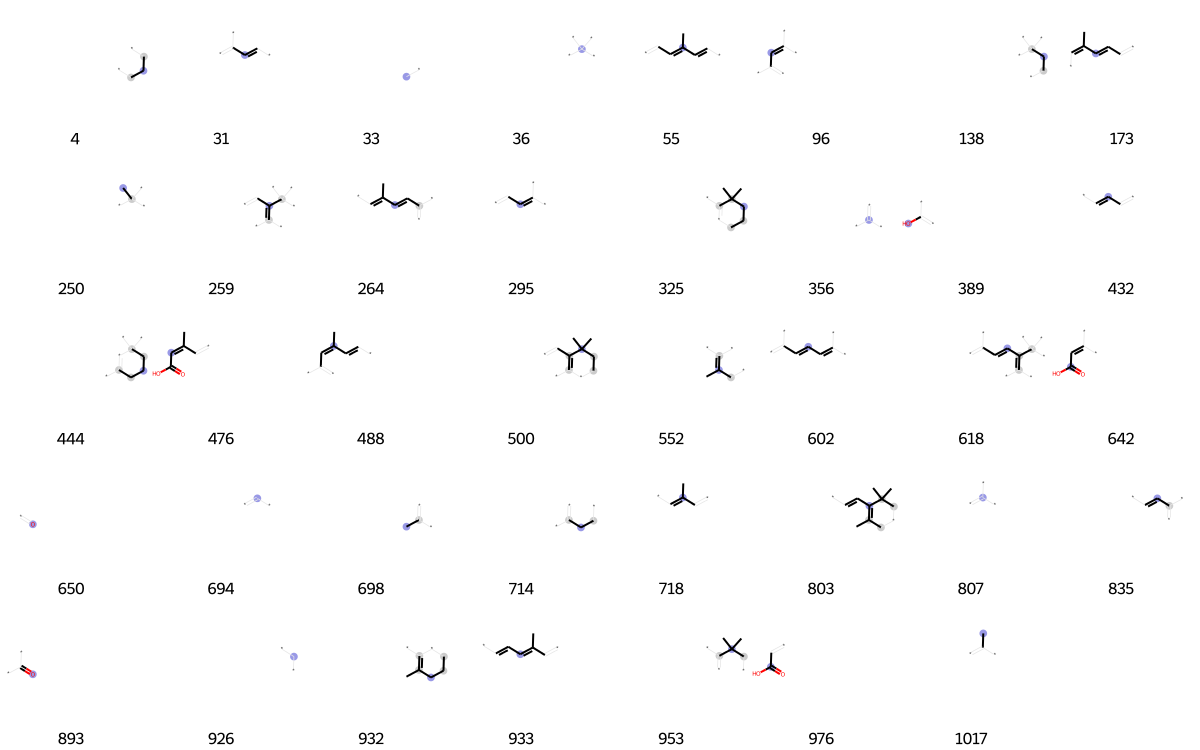

In [287]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [288]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[37, 80, 113, 114, 271, 389, 540, 650, 713, 807, 852, 880, 884, 893, 953]

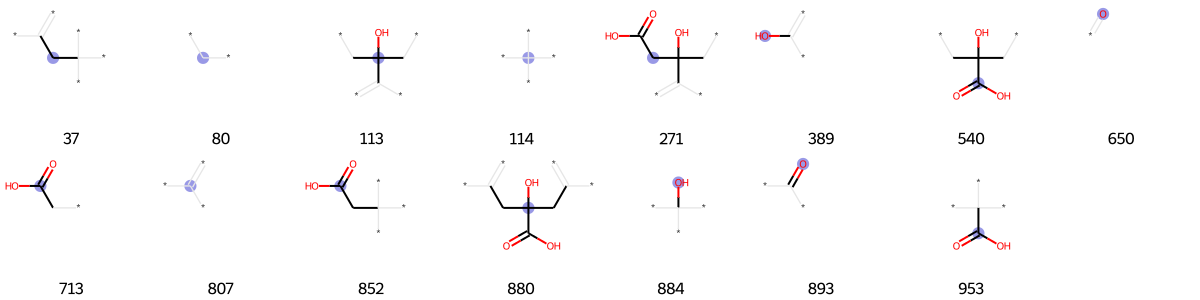

In [289]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [290]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[4,
 8,
 13,
 14,
 33,
 59,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 139,
 140,
 144,
 207,
 212,
 221,
 232,
 249,
 301,
 333,
 335,
 356,
 378,
 407,
 428,
 456,
 484,
 494,
 512,
 559,
 565,
 610,
 624,
 644,
 652,
 680,
 693,
 695,
 708,
 747,
 780,
 831,
 834,
 841,
 849,
 875,
 881,
 887,
 891,
 926,
 927,
 935,
 946,
 993,
 1018,
 1019]

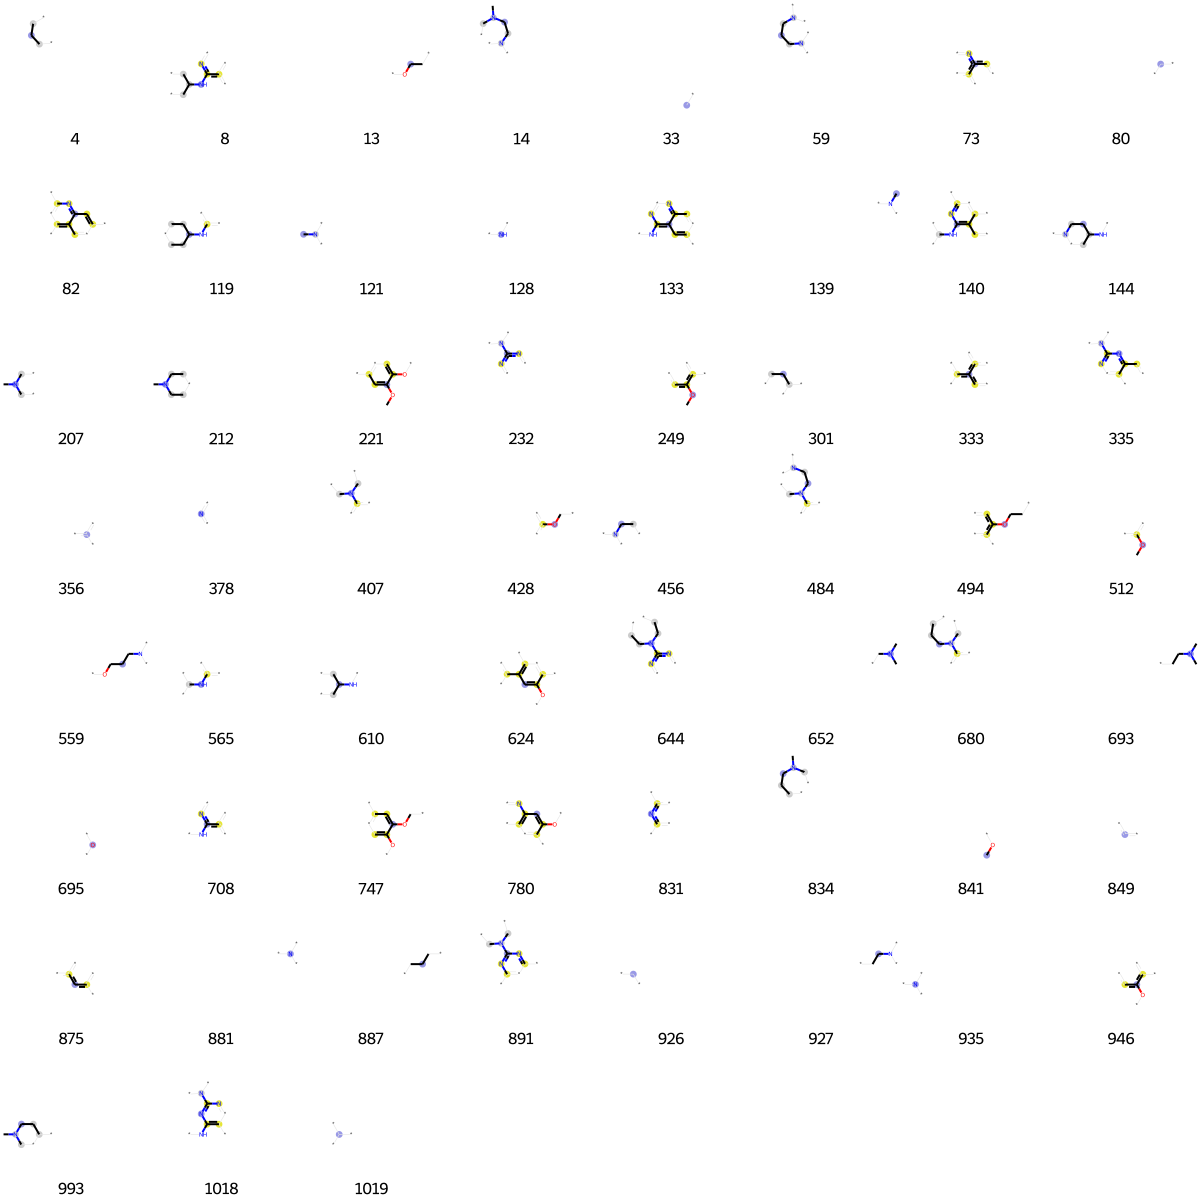

In [291]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [292]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[15,
 33,
 36,
 64,
 93,
 102,
 147,
 171,
 189,
 230,
 249,
 275,
 321,
 356,
 360,
 367,
 378,
 430,
 433,
 463,
 496,
 514,
 612,
 646,
 674,
 698,
 699,
 707,
 710,
 726,
 831,
 849,
 875,
 904,
 965,
 974]

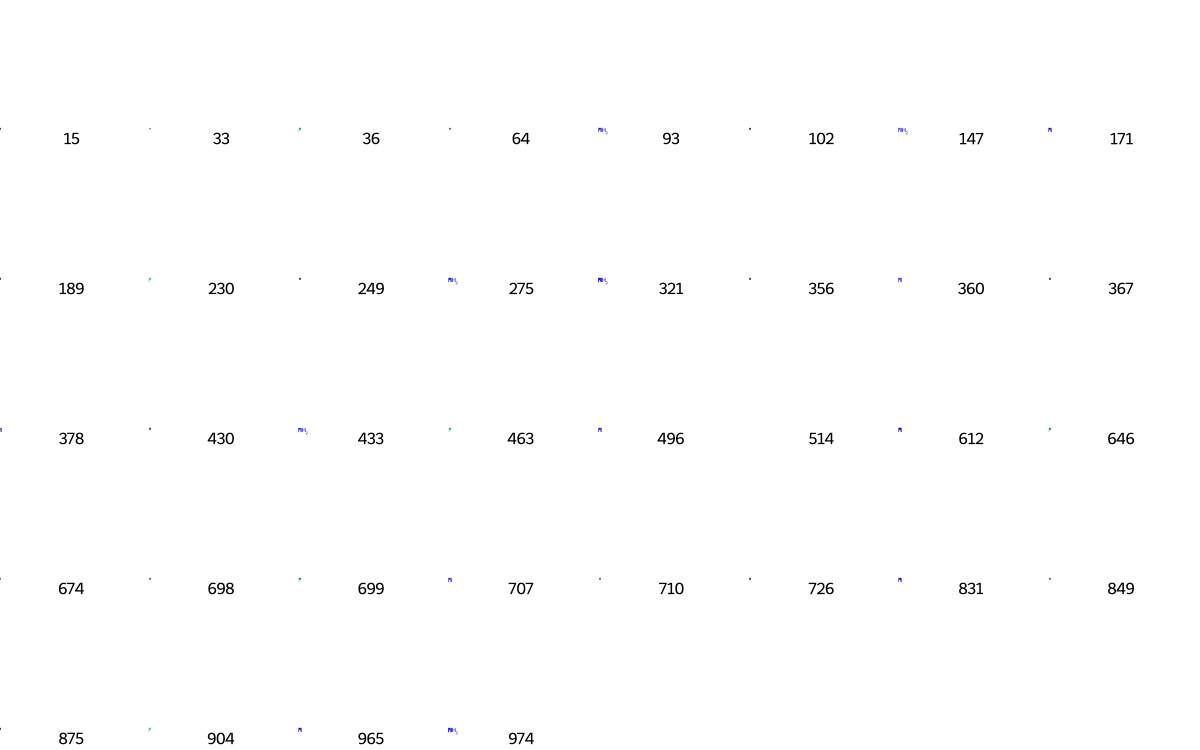

In [293]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [294]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[64,
 128,
 133,
 175,
 187,
 201,
 265,
 318,
 345,
 356,
 423,
 441,
 486,
 578,
 583,
 650,
 694,
 725,
 726,
 807,
 843,
 849,
 864,
 893,
 924,
 961,
 967,
 968,
 989]

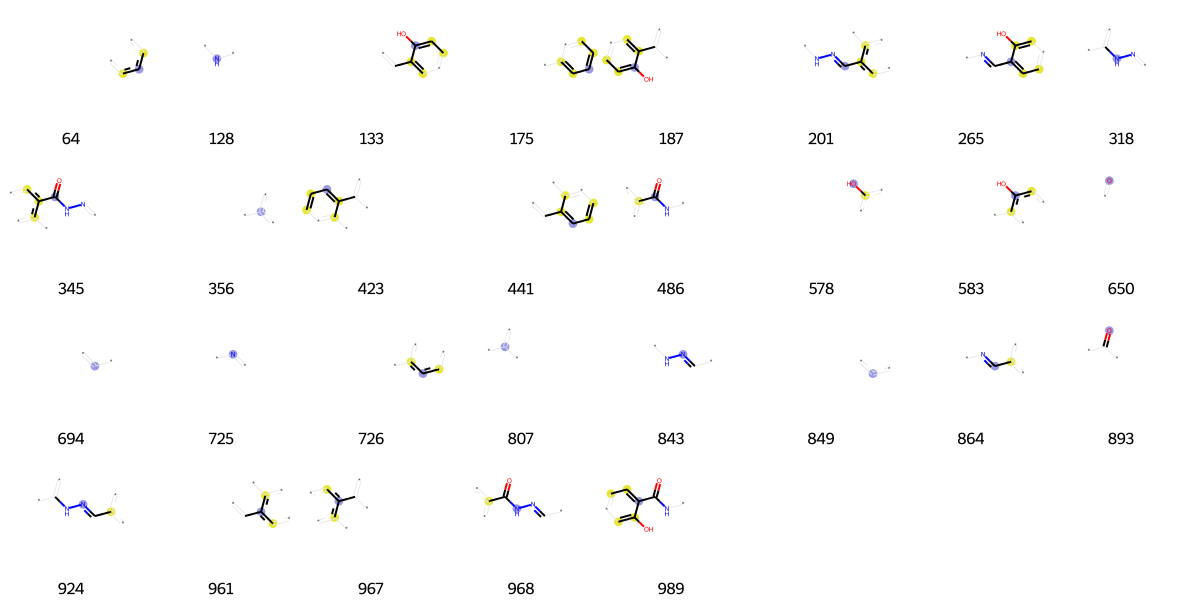

In [295]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [296]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[25,
 31,
 33,
 80,
 127,
 128,
 144,
 249,
 284,
 356,
 451,
 512,
 524,
 578,
 583,
 614,
 650,
 694,
 695,
 716,
 726,
 804,
 807,
 835,
 841,
 849,
 875,
 893,
 946,
 1009,
 1017]

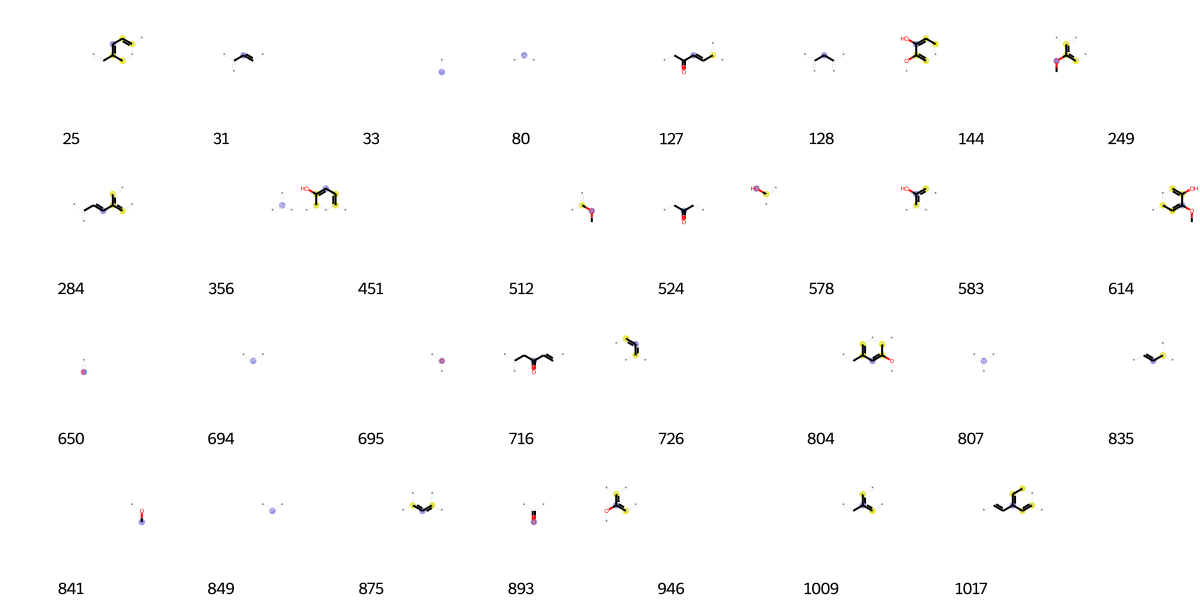

In [297]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [298]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 3,
 33,
 64,
 80,
 112,
 117,
 128,
 147,
 150,
 175,
 273,
 283,
 301,
 352,
 356,
 365,
 366,
 371,
 389,
 458,
 600,
 650,
 680,
 695,
 726,
 734,
 736,
 759,
 807,
 820,
 823,
 849,
 893,
 905,
 953,
 977,
 984,
 1019]

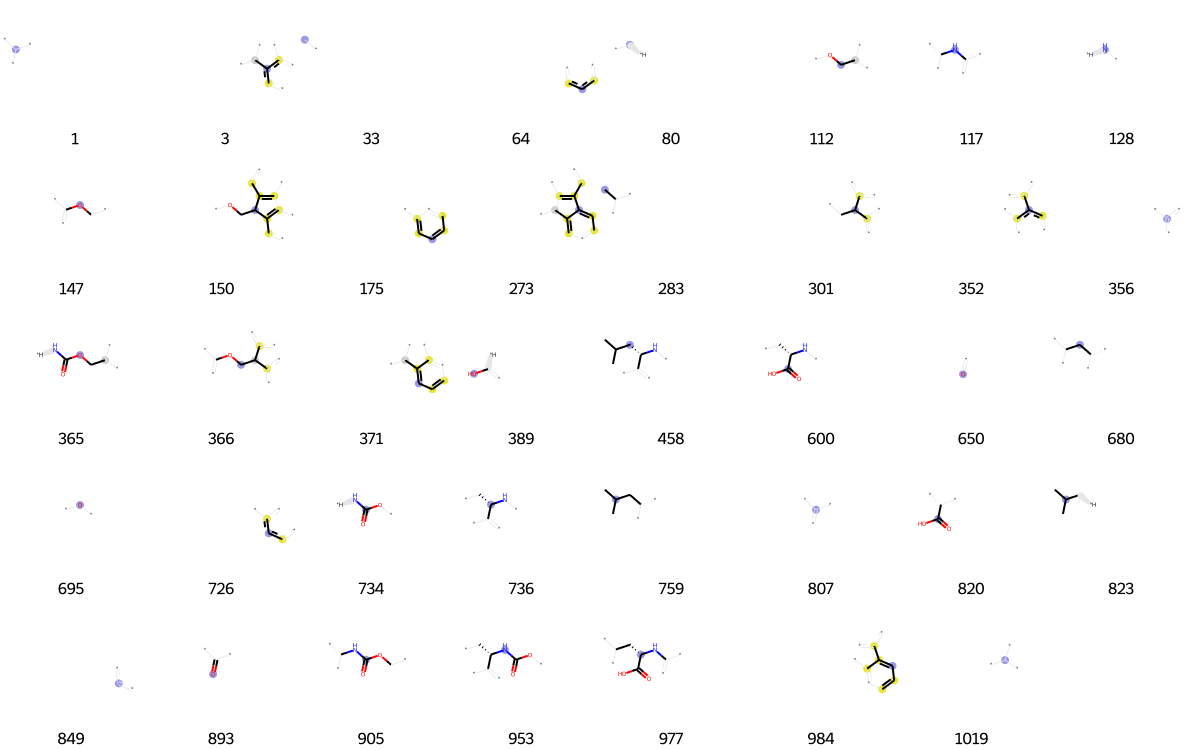

In [299]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [300]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[33,
 36,
 84,
 88,
 138,
 228,
 242,
 250,
 258,
 268,
 288,
 299,
 301,
 314,
 356,
 384,
 412,
 455,
 456,
 479,
 519,
 529,
 546,
 555,
 563,
 581,
 622,
 640,
 650,
 656,
 665,
 675,
 714,
 734,
 769,
 770,
 781,
 841,
 849,
 854,
 860,
 874,
 926,
 942,
 970,
 985,
 1009,
 1013,
 1015,
 1019]

In [303]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 147,
 220,
 227,
 283,
 315,
 341,
 356,
 451,
 473,
 578,
 583,
 589,
 674,
 726,
 749,
 760,
 786,
 807,
 829,
 849,
 875,
 966]

In [304]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 39,
 80,
 92,
 110,
 154,
 156,
 192,
 202,
 284,
 295,
 315,
 325,
 350,
 353,
 356,
 378,
 409,
 428,
 472,
 486,
 511,
 578,
 650,
 692,
 694,
 695,
 698,
 745,
 795,
 807,
 814,
 849,
 1004]

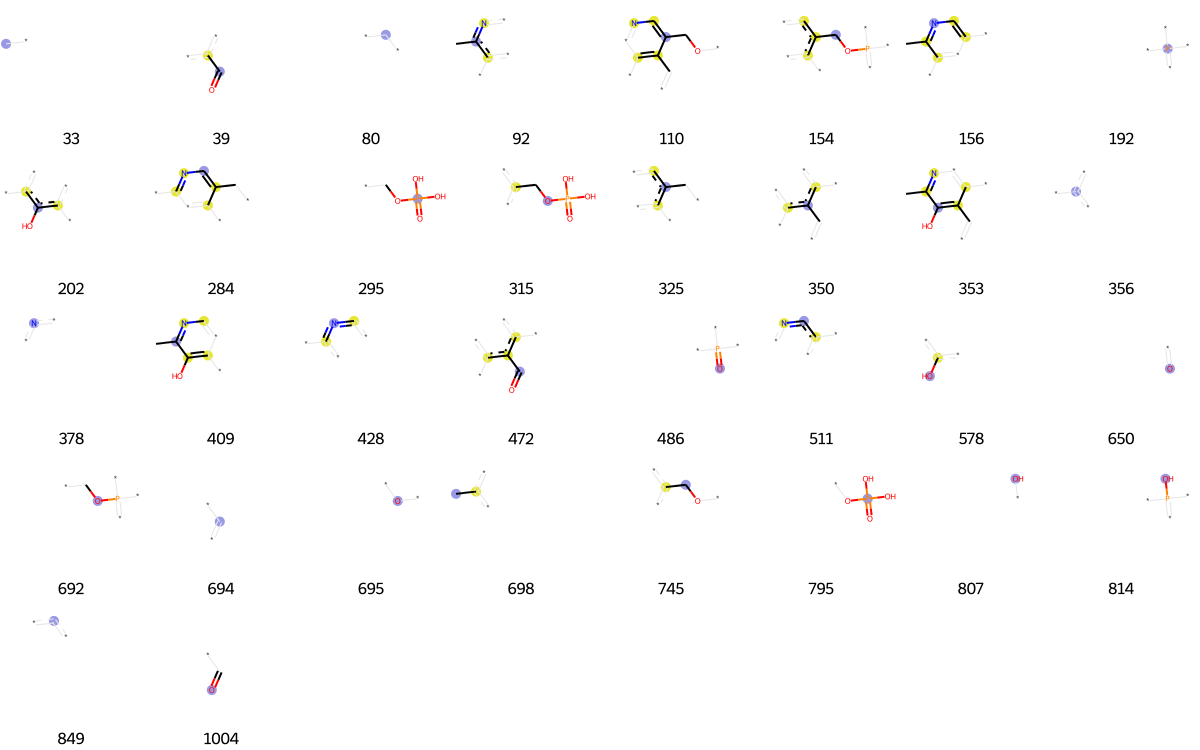

In [305]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [306]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 33,
 80,
 108,
 128,
 197,
 229,
 283,
 306,
 339,
 389,
 390,
 416,
 551,
 573,
 650,
 658,
 713,
 807,
 893,
 1000]

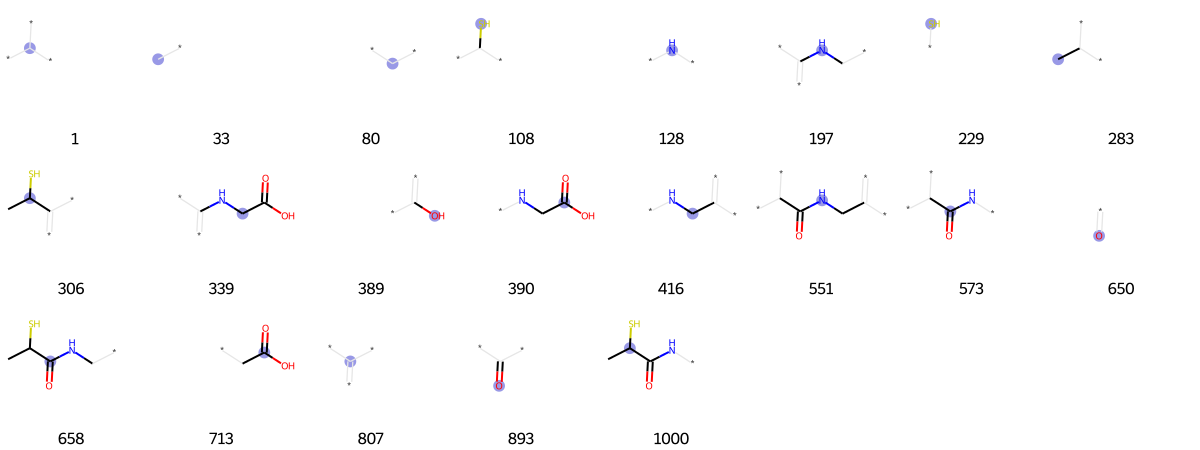

In [307]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [308]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[0,
 53,
 64,
 74,
 80,
 90,
 175,
 216,
 246,
 301,
 310,
 314,
 333,
 356,
 362,
 378,
 384,
 406,
 454,
 456,
 480,
 511,
 537,
 549,
 565,
 650,
 699,
 716,
 726,
 730,
 750,
 752,
 754,
 807,
 816,
 849,
 873,
 875,
 893,
 898,
 904,
 906,
 910,
 926,
 929,
 934,
 935,
 942,
 944,
 967,
 974,
 980,
 985,
 1019]

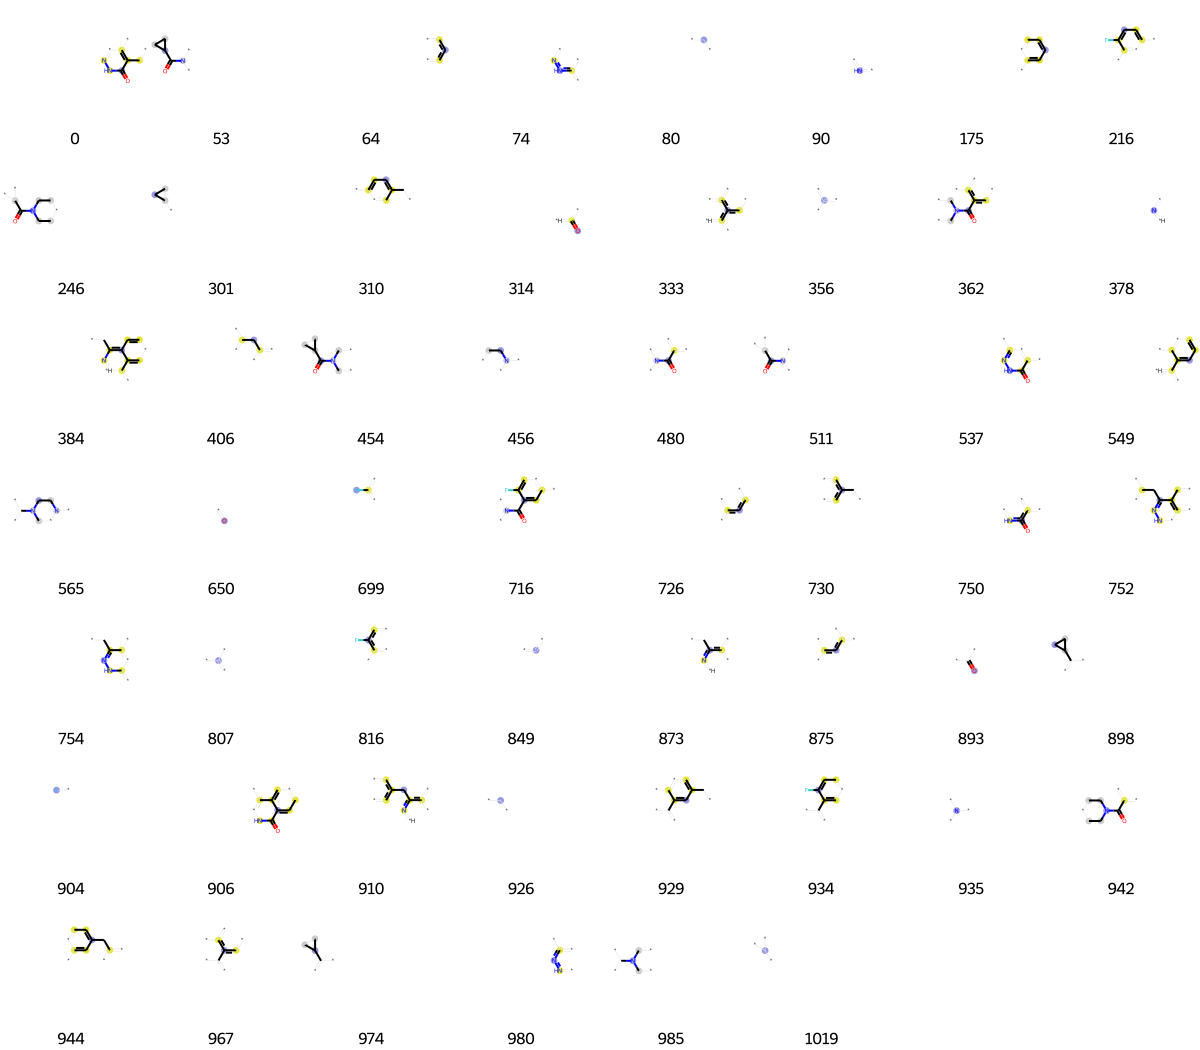

In [309]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [310]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[11,
 33,
 36,
 65,
 80,
 84,
 130,
 136,
 138,
 242,
 250,
 253,
 280,
 284,
 296,
 301,
 314,
 342,
 351,
 356,
 360,
 362,
 402,
 410,
 412,
 455,
 519,
 529,
 630,
 649,
 650,
 671,
 674,
 676,
 690,
 714,
 790,
 807,
 815,
 834,
 841,
 849,
 872,
 881,
 916,
 926,
 949,
 1019]

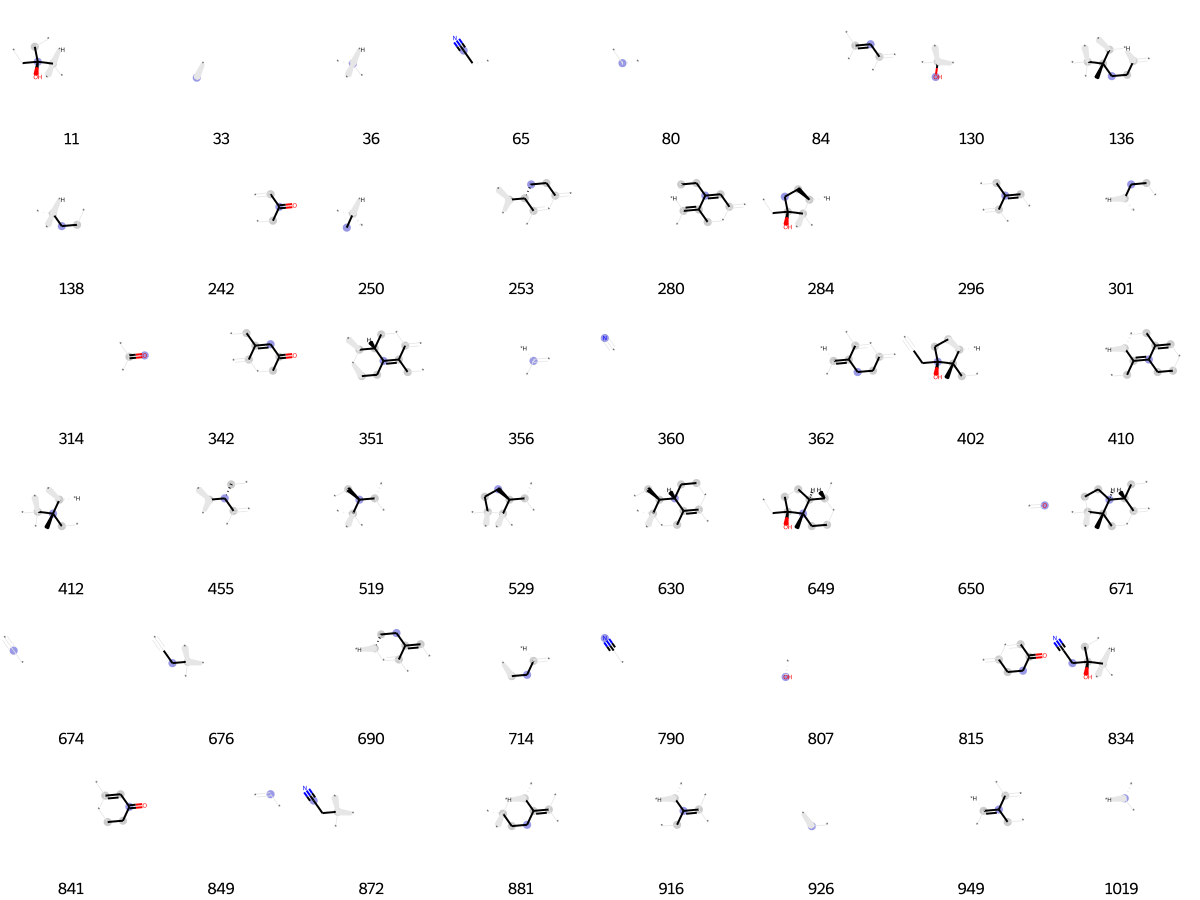

In [311]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [312]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[5,
 28,
 39,
 81,
 91,
 128,
 147,
 150,
 174,
 186,
 227,
 228,
 233,
 235,
 240,
 255,
 314,
 342,
 343,
 356,
 378,
 387,
 389,
 415,
 417,
 433,
 440,
 456,
 470,
 484,
 523,
 543,
 552,
 621,
 650,
 653,
 675,
 694,
 698,
 725,
 753,
 761,
 792,
 807,
 831,
 849,
 855,
 859,
 893,
 898,
 926,
 935,
 936,
 940,
 950,
 997,
 998,
 1019]

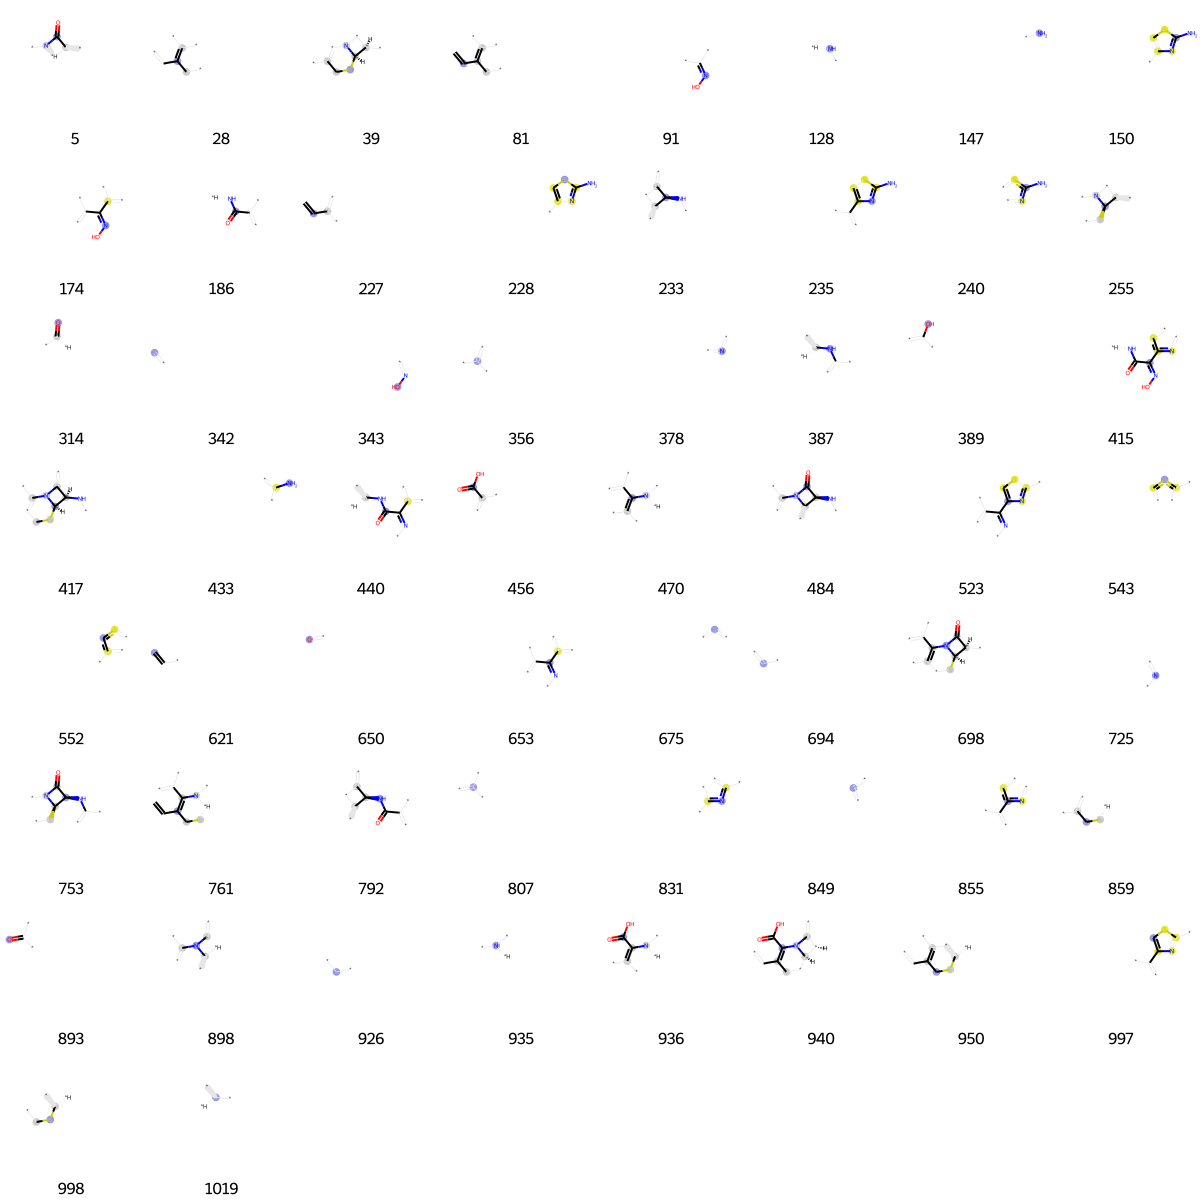

In [313]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [314]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 53,
 80,
 147,
 222,
 314,
 353,
 356,
 378,
 433,
 435,
 464,
 488,
 492,
 541,
 569,
 577,
 606,
 639,
 650,
 656,
 675,
 689,
 699,
 804,
 807,
 816,
 821,
 822,
 831,
 849,
 863,
 897,
 899,
 904,
 926,
 935,
 966,
 989,
 998,
 1019]

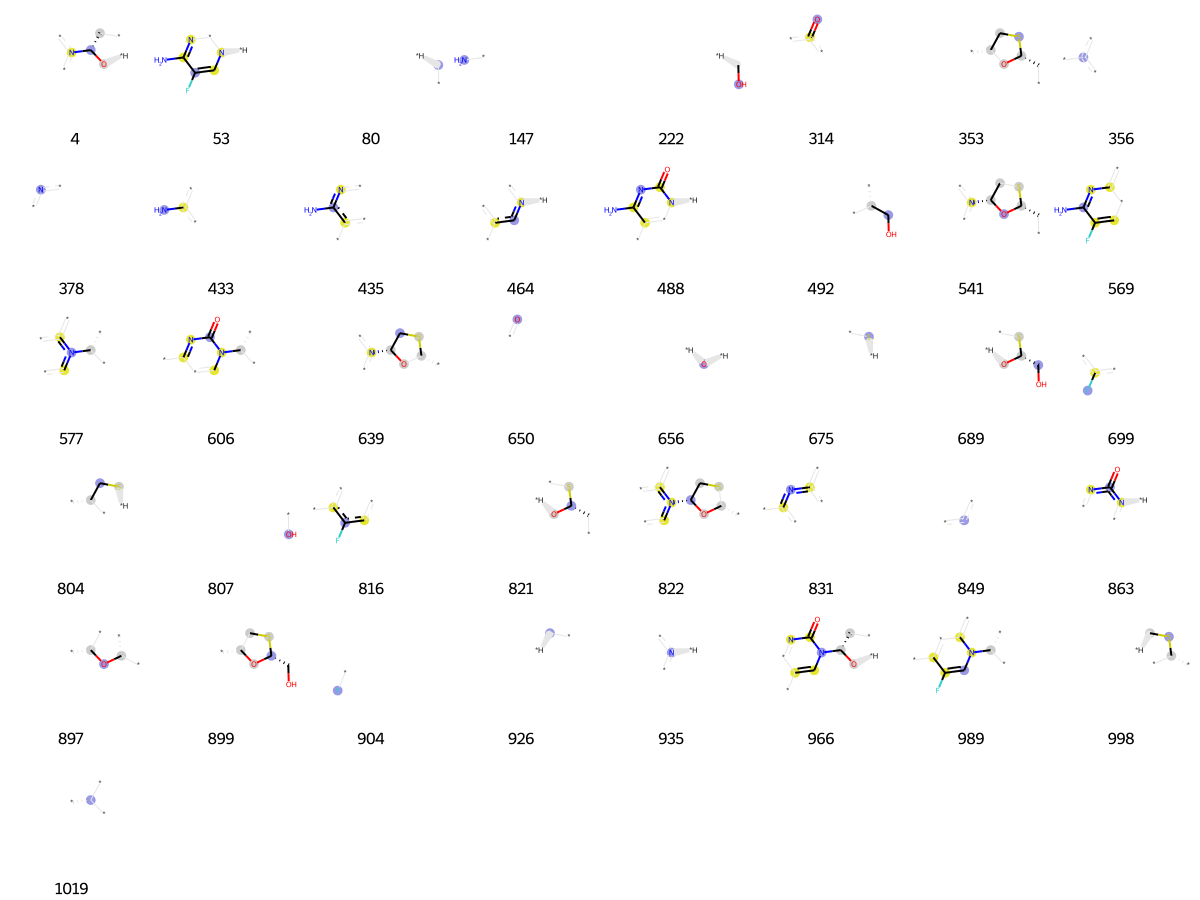

In [315]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [316]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[19,
 42,
 64,
 80,
 114,
 192,
 356,
 378,
 437,
 476,
 486,
 510,
 511,
 562,
 579,
 610,
 645,
 650,
 726,
 730,
 756,
 807,
 814,
 842,
 849,
 874,
 884,
 888,
 889]

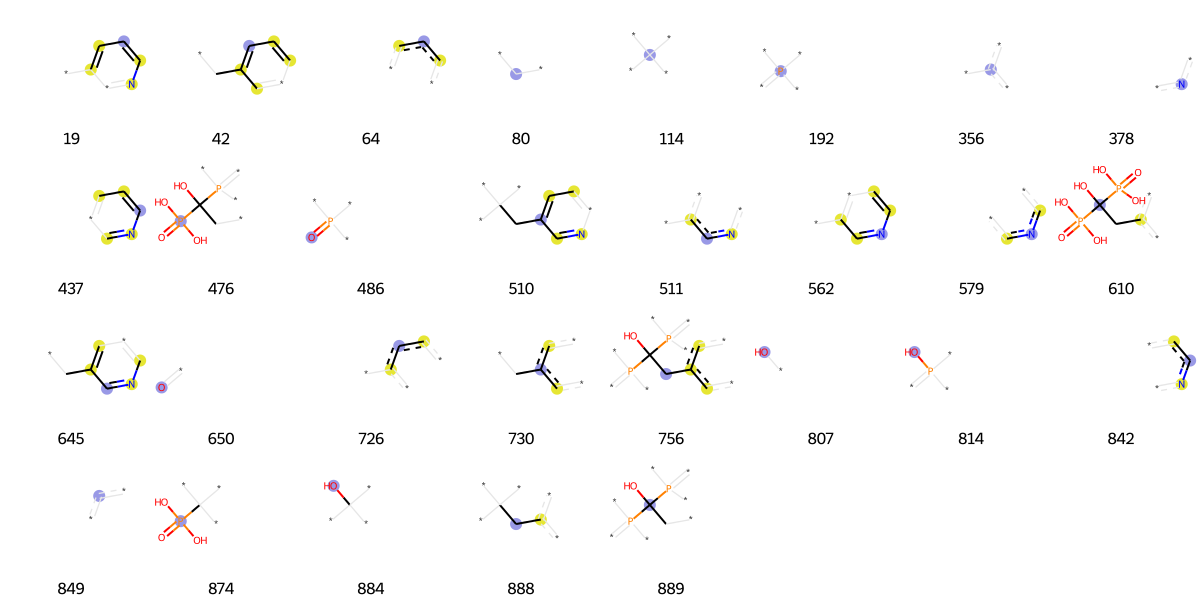

In [317]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [318]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 61,
 64,
 72,
 73,
 102,
 110,
 111,
 139,
 159,
 175,
 259,
 289,
 322,
 333,
 356,
 362,
 378,
 389,
 512,
 541,
 549,
 695,
 698,
 718,
 726,
 781,
 831,
 841,
 849,
 881,
 941,
 960]

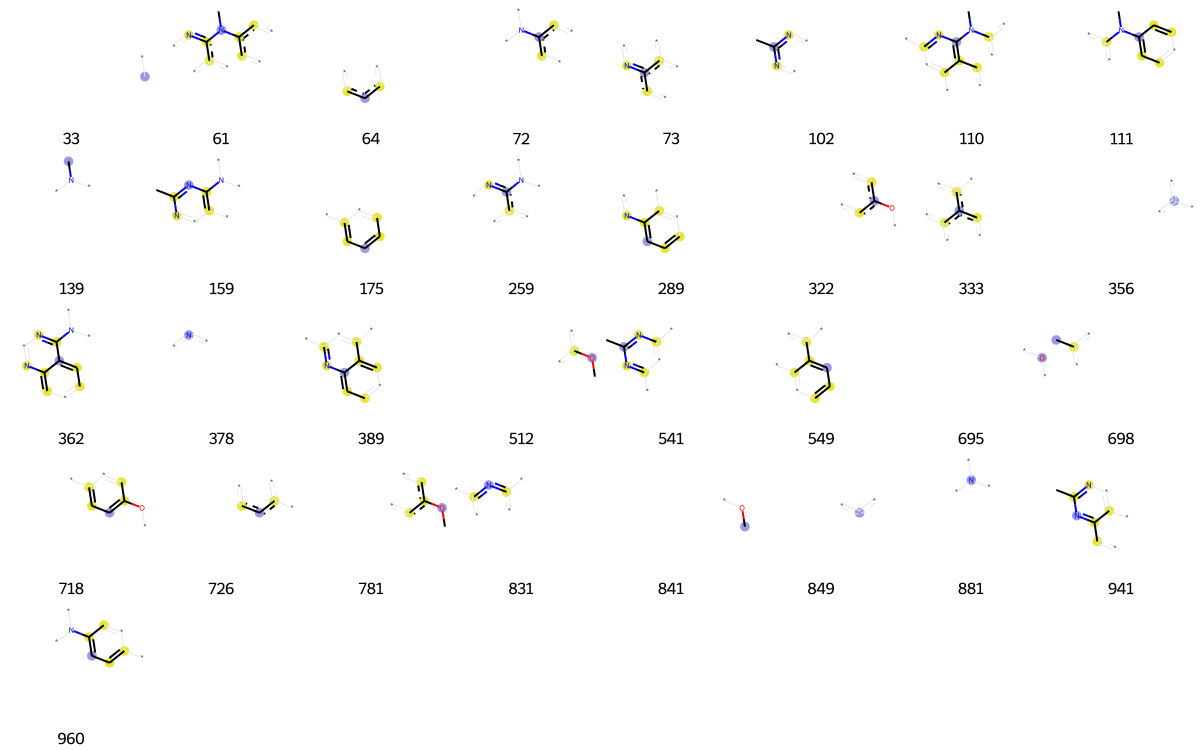

In [319]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [320]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[3,
 15,
 25,
 62,
 64,
 109,
 114,
 152,
 175,
 181,
 236,
 271,
 314,
 317,
 352,
 356,
 389,
 393,
 394,
 429,
 498,
 511,
 623,
 647,
 650,
 662,
 725,
 726,
 753,
 801,
 809,
 830,
 849,
 875,
 879,
 885,
 904,
 935,
 984,
 993]

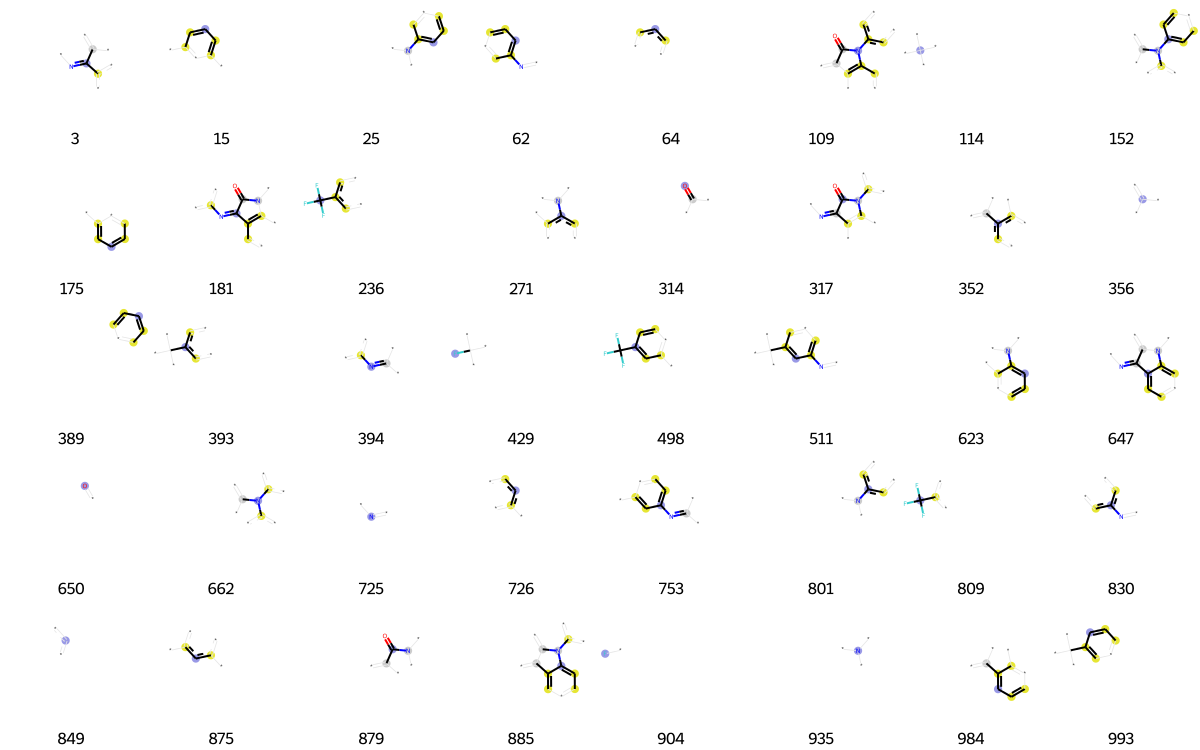

In [321]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [322]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 42,
 80,
 128,
 147,
 162,
 167,
 209,
 231,
 240,
 274,
 277,
 294,
 301,
 324,
 356,
 378,
 433,
 545,
 546,
 600,
 610,
 667,
 675,
 714,
 794,
 812,
 814,
 831,
 866,
 924,
 926,
 960,
 1002,
 1019]

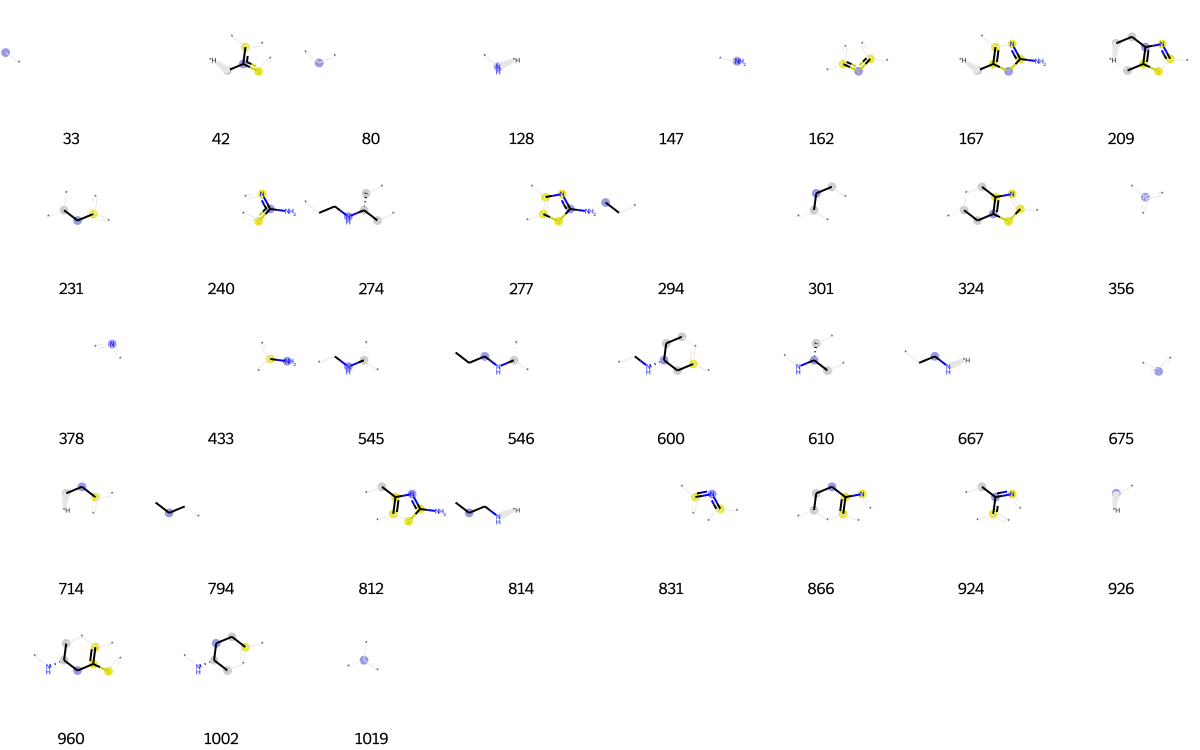

In [323]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [324]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 20,
 33,
 34,
 36,
 52,
 64,
 65,
 80,
 121,
 139,
 170,
 175,
 230,
 255,
 294,
 314,
 356,
 381,
 389,
 417,
 432,
 456,
 458,
 523,
 539,
 556,
 631,
 650,
 656,
 726,
 739,
 767,
 772,
 825,
 832,
 849,
 899,
 926,
 935,
 950,
 1017,
 1019]

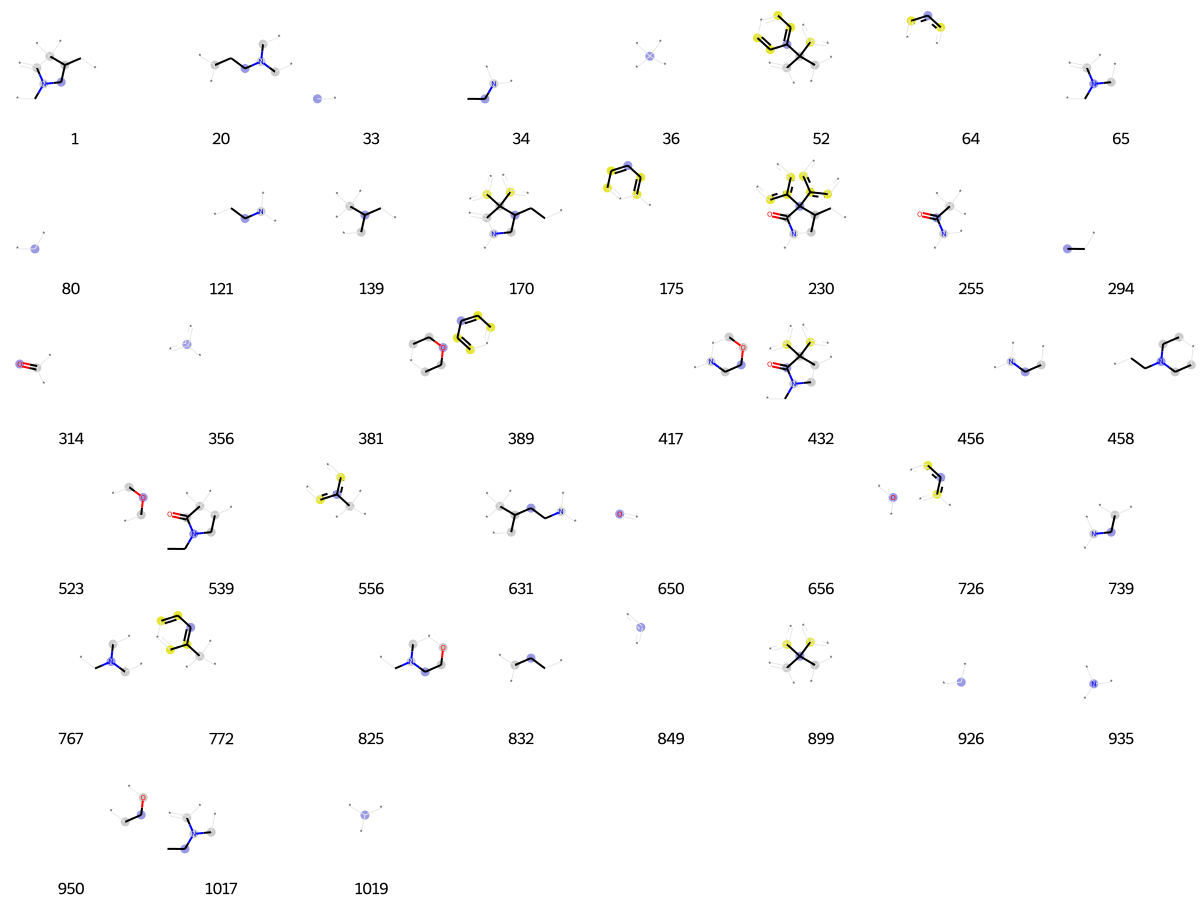

In [325]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])